In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import missingno as msno
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
warnings.filterwarnings('ignore')

In [3]:
print('Numpy Version',np.__version__)
print('Pandas Version',pd.__version__)
print('Seaborn Version',sns.__version__)

Numpy Version 1.26.4
Pandas Version 2.1.4
Seaborn Version 0.13.1


In [5]:
# Loading the Data set in the dataframe
df = pd.read_csv('/content/hotel_bookings.csv')

# Checking the firat 5 rows of the data
df.head()

,hotel,is_canceled,booking_date,arrival_date,stays_in_weekend_nights,stays_in_week_nights,adults,children,meal,country,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,required_car_parking_spaces,totalno_of_special_requests
0,type_2,0,24/07/2017,01/07/2018,0,0,2,0,Only Breakfast,PRT,...,C,C,3,No Deposit,NaN,NaN,0,Transient,0,0
1,type_2,0,24/06/2016,01/07/2018,0,0,2,0,Only Breakfast,PRT,...,C,C,4,No Deposit,NaN,NaN,0,Transient,0,0
2,type_2,0,24/06/2018,01/07/2018,0,1,1,0,Only Breakfast,GBR,...,A,C,0,No Deposit,NaN,NaN,0,Transient,0,0
3,type_2,0,18/06/2018,01/07/2018,0,1,1,0,Only Breakfast,GBR,...,A,A,0,No Deposit,304.0,NaN,0,Transient,0,0
4,type_2,0,17/06/2018,01/07/2018,0,2,2,0,Only Breakfast,GBR,...,A,A,0,No Deposit,240.0,NaN,0,Transient,0,1


Step 2 : Exploring the dataset:

Exploring the dataset's shape (shape), column names (columns), and providing summary information (info()) to understand the data types and presence of missing values.

In [6]:
# Checking the shape of the data
df.shape

(119390, 25)

This dataset contains 119390 rows & 25 columns


In [ ]:
# Display the column names
df.columns

Index(['hotel', 'is_canceled', 'booking_date', 'arrival_date',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_customer', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type',
       'required_car_parking_spaces', 'totalno_of_special_requests'],
      dtype='object')

In [ ]:
# Checking data variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   booking_date                    119390 non-null  object 
 3   arrival_date                    119390 non-null  object 
 4   stays_in_weekend_nights         119390 non-null  int64  
 5   stays_in_week_nights            119390 non-null  int64  
 6   adults                          119390 non-null  int64  
 7   children                        119390 non-null  int64  
 8   meal                            119390 non-null  object 
 9   country                         118902 non-null  object 
 10  market_segment                  119390 non-null  object 
 11  distribution_channel            119390 non-null  object 
 12  is_repeated_cust

**This** dataset contains 11 object variables, 12 integer variables, 2 float variables. Booking_date and arrival_date are shown as object should ebe converted into dte type.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.0,0.0,0.0,1.0,1.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.0,0.0,1.0,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.0,1.0,2.0,3.0,50.0
adults,119390.0,1.856403,0.579261,0.0,2.0,2.0,2.0,55.0
children,119390.0,0.111835,0.412561,0.0,0.0,0.0,0.0,10.0
is_repeated_customer,119390.0,0.031912,0.175767,0.0,0.0,0.0,0.0,1.0
previous_cancellations,119390.0,0.087118,0.844336,0.0,0.0,0.0,0.0,26.0
previous_bookings_not_canceled,119390.0,0.137097,1.497437,0.0,0.0,0.0,0.0,72.0
booking_changes,119390.0,0.221124,0.652306,0.0,0.0,0.0,0.0,21.0
agent,103050.0,86.693382,110.774548,1.0,9.0,14.0,229.0,535.0


Observation from this table is that there are 55 adults there in one room, Hence we will explore how many rooms were booked were adults were more than 10.


In [ ]:
df[df['adults'] > 10].head()

,hotel,is_canceled,booking_date,arrival_date,stays_in_weekend_nights,stays_in_week_nights,adults,children,meal,country,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,required_car_parking_spaces,totalno_of_special_requests
1539,type_2,1,03/11/2017,03/09/2018,0,3,40,0,Only Breakfast,PRT,...,A,A,0,No Deposit,NaN,NaN,0,Group,0,0
1587,type_2,1,07/10/2017,05/09/2018,2,5,26,0,Only Breakfast,PRT,...,A,A,0,No Deposit,96.0,NaN,0,Group,0,0
1643,type_2,1,06/10/2017,07/09/2018,1,2,50,0,Only Breakfast,PRT,...,A,A,0,No Deposit,NaN,NaN,0,Group,0,0
1752,type_2,1,07/10/2017,12/09/2018,2,5,26,0,Only Breakfast,PRT,...,A,A,0,No Deposit,96.0,NaN,0,Group,0,0
1884,type_2,1,07/10/2017,19/09/2018,2,5,26,0,Only Breakfast,PRT,...,A,A,0,No Deposit,96.0,NaN,0,Group,0,0


It is observed that adults with more than 10 bookings come under group in customer type


In [ ]:
df.describe(include ='object').T

,count,unique,top,freq
hotel,119390,2,type_1,79330
booking_date,119390,985,17/10/2017,2511
arrival_date,119390,792,05/12/2018,448
meal,119390,4,Only Breakfast,92310
country,118902,177,PRT,48590
market_segment,119390,8,Online Travel Agents,56477
distribution_channel,119390,5,TA/TO,97870
reserved_room_type,119390,10,A,85994
assigned_room_type,119390,12,A,74053
deposit_type,119390,3,No Deposit,104641


#Data Cleaning

Checking Uniques values for each variable


In [ ]:
 # Print the unique values and their counts for each feature
for column in df.columns:
    print(f"Unique values and counts in '{column}':")
    print(df[column].value_counts())
    print("\n")

Unique values and counts in 'hotel':
hotel
type_1    79330
type_2    40060
Name: count, dtype: int64


Unique values and counts in 'is_canceled':
is_canceled
0    75166
1    44224
Name: count, dtype: int64


Unique values and counts in 'booking_date':
booking_date
17/10/2017    2511
09/07/2018     874
02/10/2018     832
06/07/2018     777
07/07/2018     633
              ... 
22/09/2017       1
15/11/2017       1
18/04/2017       1
16/08/2017       1
24/07/2017       1
Name: count, Length: 985, dtype: int64


Unique values and counts in 'arrival_date':
arrival_date
05/12/2018    448
07/11/2019    366
16/10/2018    356
13/10/2019    344
18/09/2018    340
             ... 
15/12/2018     29
15/11/2018     28
07/12/2018     27
29/11/2018     20
13/12/2018     19
Name: count, Length: 792, dtype: int64


Unique values and counts in 'stays_in_weekend_nights':
stays_in_weekend_nights
0     51998
2     33308
1     30626
4      1855
3      1259
6       153
5        79
8        60
7        19
9 

In [7]:
# Checking for null values
df.isnull().sum()

,0
hotel,0
is_canceled,0
booking_date,0
arrival_date,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0
children,0
meal,0
country,488


<Axes: >

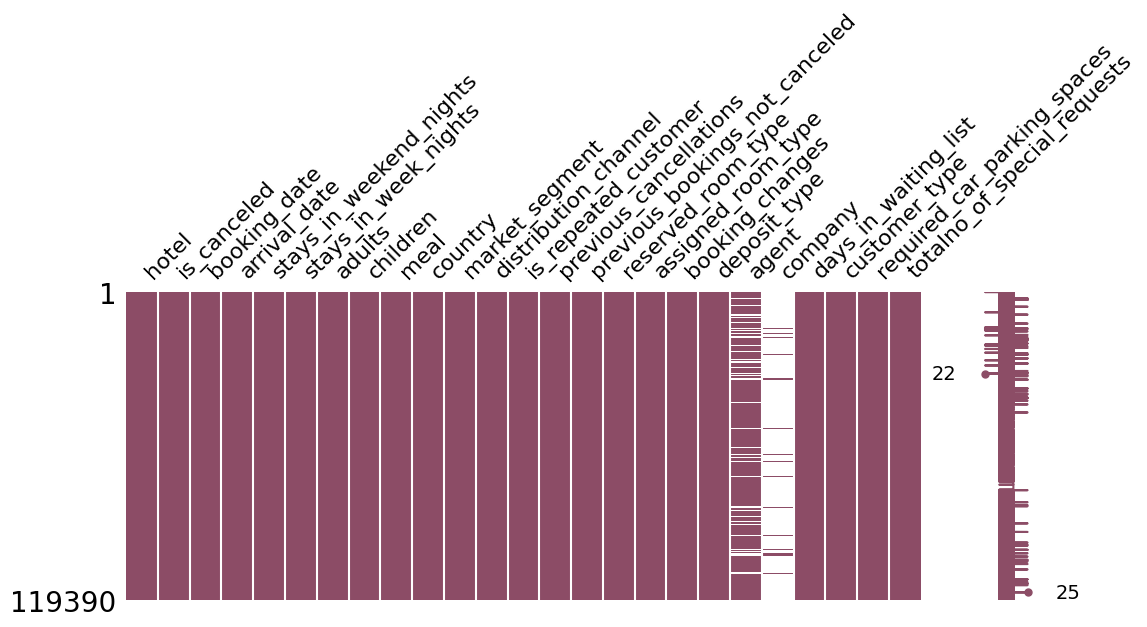

In [ ]:
msno.matrix(df,color=(0.55, 0.30, 0.40),width_ratios=(4, .5),figsize=(12,4))  # checking for missing values

In [8]:
df.drop(columns= ['company'], inplace = True)

In [ ]:
df.isnull().sum()

hotel                                 0
is_canceled                           0
booking_date                          0
arrival_date                          0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
meal                                  0
country                             488
market_segment                        0
distribution_channel                  0
is_repeated_customer                  0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             16340
days_in_waiting_list                  0
customer_type                         0
required_car_parking_spaces           0
totalno_of_special_requests           0
dtype: int64

Replacing the missing values

In [9]:
# Replacing na values of country with mode
df['country'].fillna(df['country'].mode()[0], inplace = True)

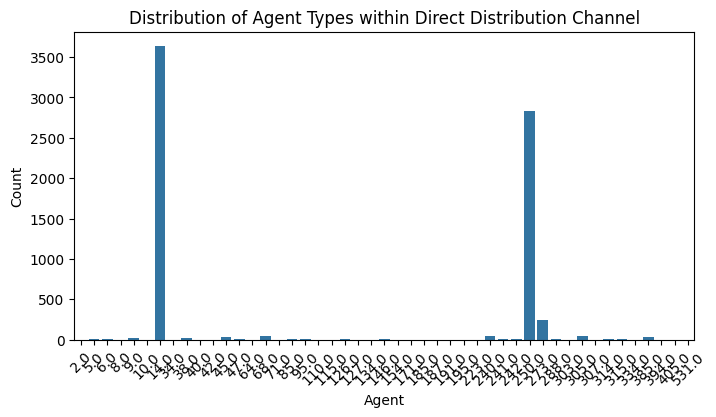

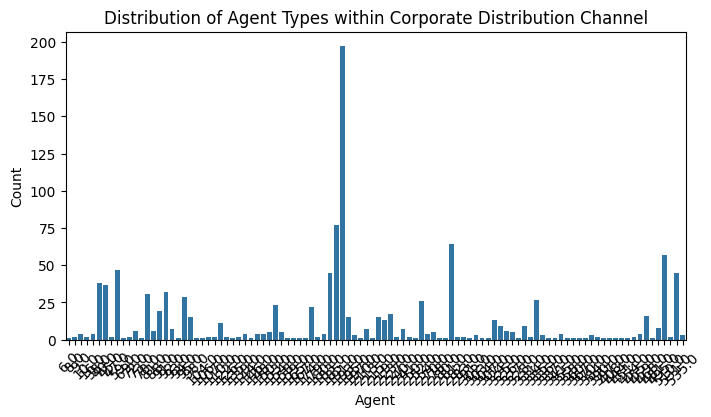

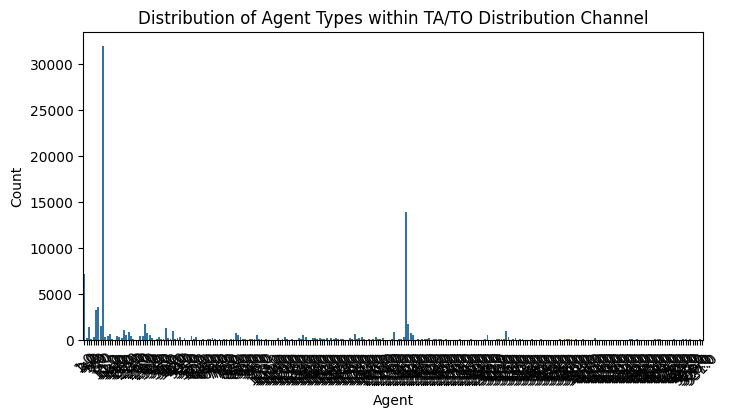

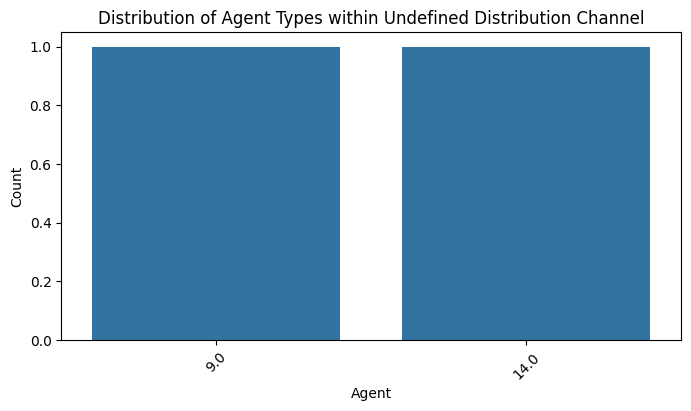

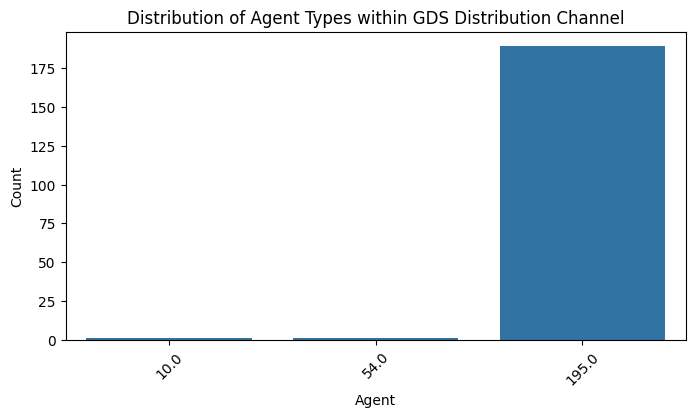

In [ ]:
# Get the unique distribution channels
distribution_channels = df['distribution_channel'].unique()

# Plot the distribution of agent types for each distribution channel separately
for channel in distribution_channels:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df[df['distribution_channel'] == channel], x='agent')
    plt.title(f'Distribution of Agent Types within {channel} Distribution Channel')
    plt.xlabel('Agent')
    plt.ylabel('Count')
    plt.xticks(rotation=45)

In [10]:
# the missing value in the agent code will be changed basis the distribution channel.  for replacing it,
#the mode of agent code in that specific distribution channel will be considered

# Define a function to fill missing agent values based on mode within each distribution channel
def fill_missing_agent(row):
    if pd.isnull(row['agent']):
        mode_agent = df[df['distribution_channel'] == row['distribution_channel']]['agent'].mode()[0]
        return mode_agent
    else:
        return row['agent']

# Apply the function to fill missing agent values
df['agent'] = df.apply(fill_missing_agent, axis=1)

In [11]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
booking_date,0
arrival_date,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0
children,0
meal,0
country,0


In [12]:
# Calculating the mode of adults where adults is 0
mode_adult = df[df['adults'] != 0]['adults'].mode()[0]

In [13]:
# Replacing values in "adults" column with the mode
df['adults'] = df['adults'].replace(0, mode_adult)

In [14]:
df['adults'].value_counts()

,count
adults,
2,90083
1,23027
3,6202
4,62
26,5
27,2
20,2
5,2
40,1


In [15]:
# Replacing Undefined value from market segment with the mode
mode_marketsegment = df[df['market_segment'] != 'Undefined']['market_segment'].mode()[0]

In [16]:
df['market_segment'] = df['market_segment'].replace('Undefined', mode_marketsegment)

In [17]:
df['market_segment'].value_counts()

,count
market_segment,
Online Travel Agents,56479
Offline Travel Agents/Operators,24219
Groups,19811
Direct,12606
Corporate,5295
Complementary,743
Aviation,237


In [18]:
# Replacing Undefined from distribution channel with the mode
mode_distribution = df[df['distribution_channel'] != 'Undefined']['distribution_channel'].mode()[0]

In [19]:
df['distribution_channel']= df['distribution_channel'].replace('Undefined', mode_distribution)

In [20]:
df['distribution_channel'].value_counts()

,count
distribution_channel,
TA/TO,97875
Direct,14645
Corporate,6677
GDS,193


In [21]:
# Changing the data type of booking_date & arrival_date to date
df['booking_date'] = pd.to_datetime(df['booking_date'], format= '%d/%m/%Y')
df['arrival_date'] = pd.to_datetime(df['arrival_date'], format= '%d/%m/%Y')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   booking_date                    119390 non-null  datetime64[ns]
 3   arrival_date                    119390 non-null  datetime64[ns]
 4   stays_in_weekend_nights         119390 non-null  int64         
 5   stays_in_week_nights            119390 non-null  int64         
 6   adults                          119390 non-null  int64         
 7   children                        119390 non-null  int64         
 8   meal                            119390 non-null  object        
 9   country                         119390 non-null  object        
 10  market_segment                  119390 non-null  object 

# EDA

Univariate Analysis


# Create frequency chart for each categorical variable


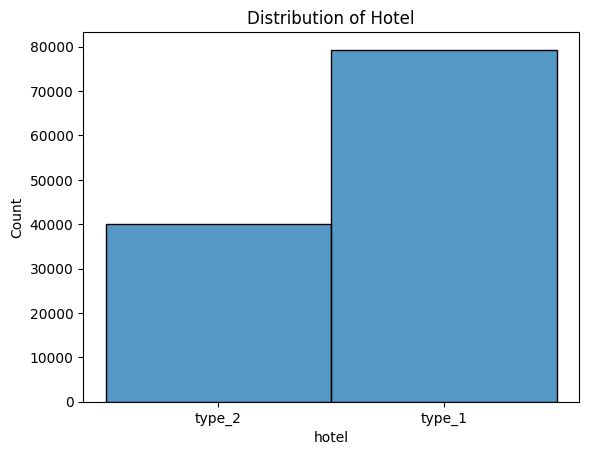

In [ ]:
sns.histplot(data=df, x="hotel", binwidth= 2)
plt.title('Distribution of Hotel')
plt.show()

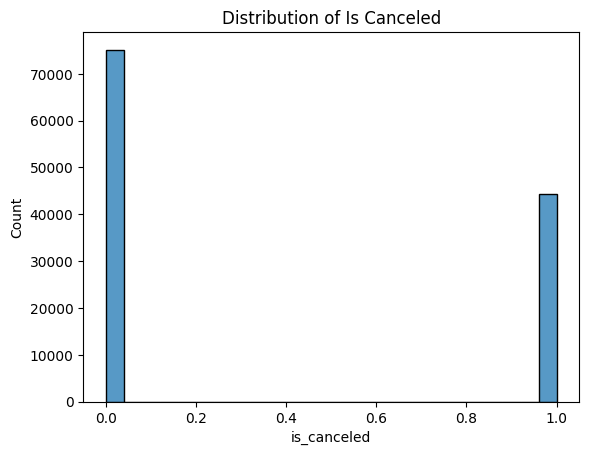

In [ ]:
sns.histplot(data=df, x="is_canceled")
plt.title('Distribution of Is Canceled')
plt.show()

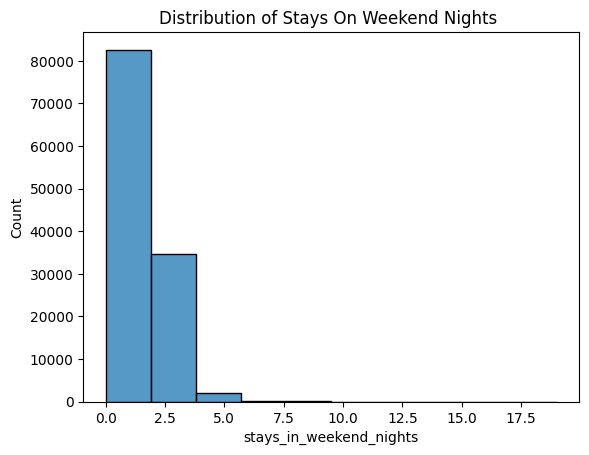

In [ ]:
sns.histplot(data=df, x="stays_in_weekend_nights", binwidth= 2)
plt.title('Distribution of Stays On Weekend Nights ')
plt.show()

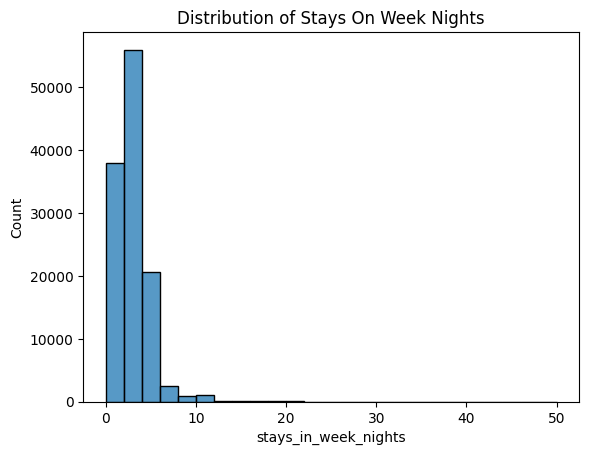

In [ ]:
sns.histplot(data=df, x="stays_in_week_nights", binwidth= 2)
plt.title('Distribution of Stays On Week Nights')
plt.show()

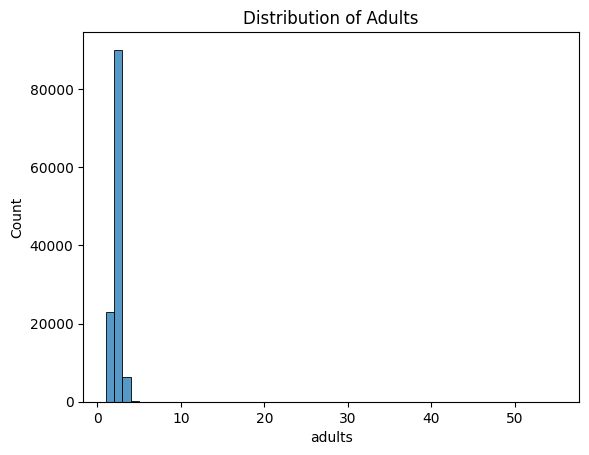

In [ ]:
sns.histplot(data=df, x="adults", binwidth= 1)
plt.title('Distribution of Adults')
plt.show()

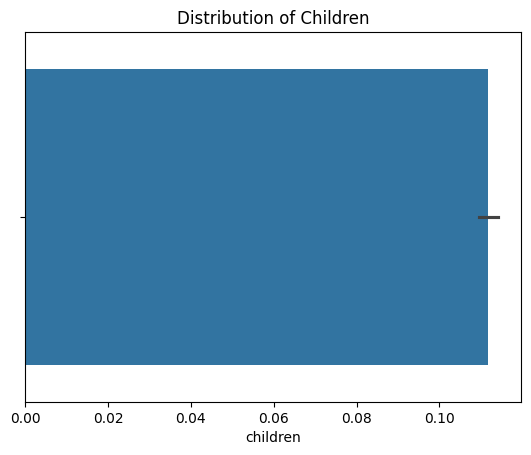

In [ ]:
sns.barplot(data=df, x="children")
plt.title('Distribution of Children')
plt.show()

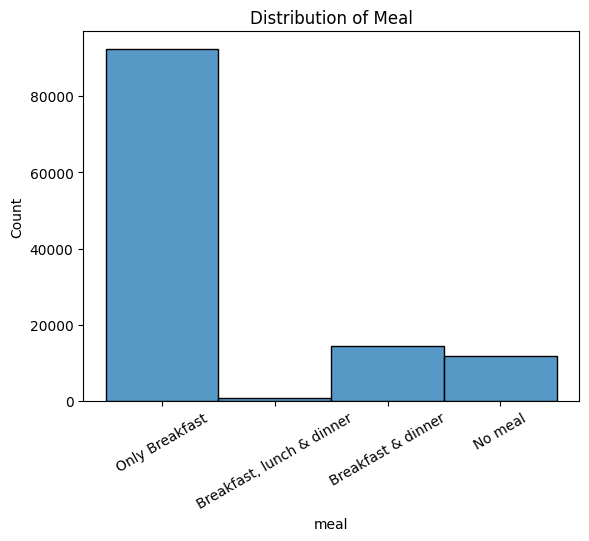

In [ ]:
sns.histplot(data=df, x="meal", binwidth= 1)
plt.title('Distribution of Meal')
plt.xticks(rotation=30)
plt.show()

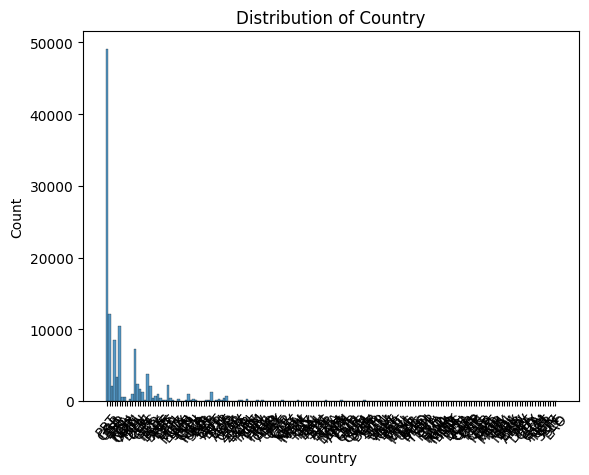

In [ ]:
sns.histplot(data=df, x="country", binwidth= 15)
plt.title('Distribution of Country')
plt.xticks(rotation=50)
plt.show()

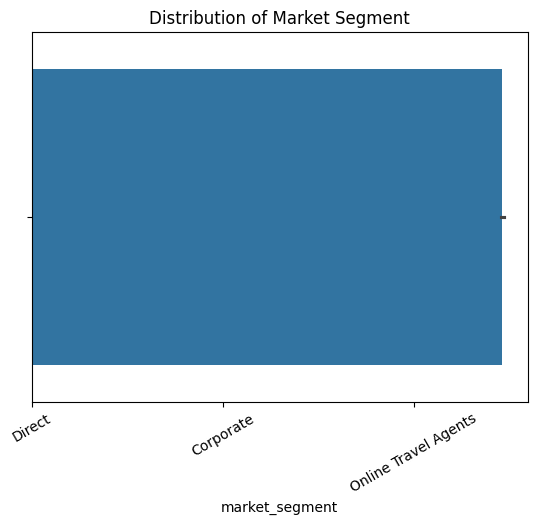

In [ ]:
sns.barplot(data=df, x="market_segment")
plt.title('Distribution of Market Segment')
plt.xticks(rotation=30)
plt.show()

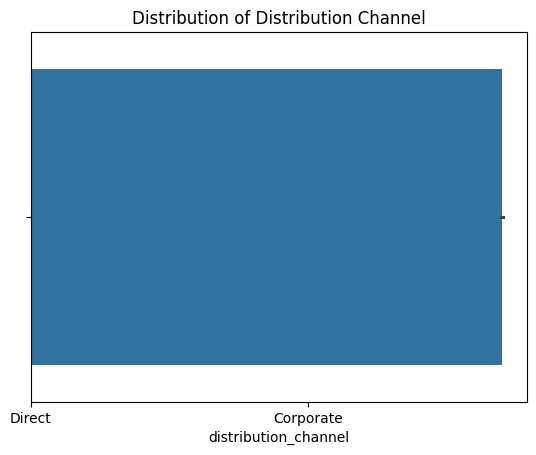

In [ ]:
sns.barplot(data=df, x="distribution_channel")
plt.title('Distribution of Distribution Channel')
plt.show()

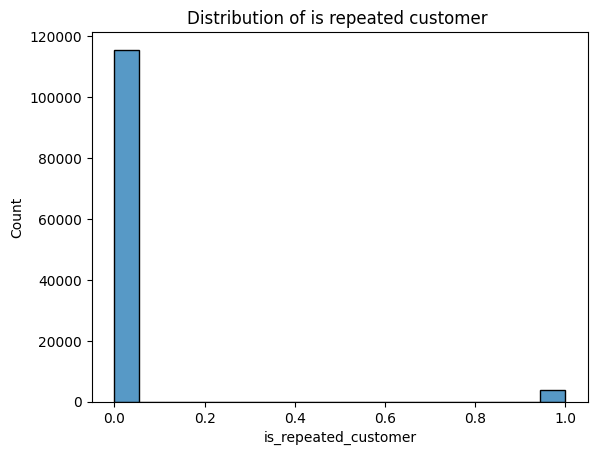

In [ ]:
sns.histplot(data=df, x="is_repeated_customer")
plt.title('Distribution of is repeated customer ')
plt.show()

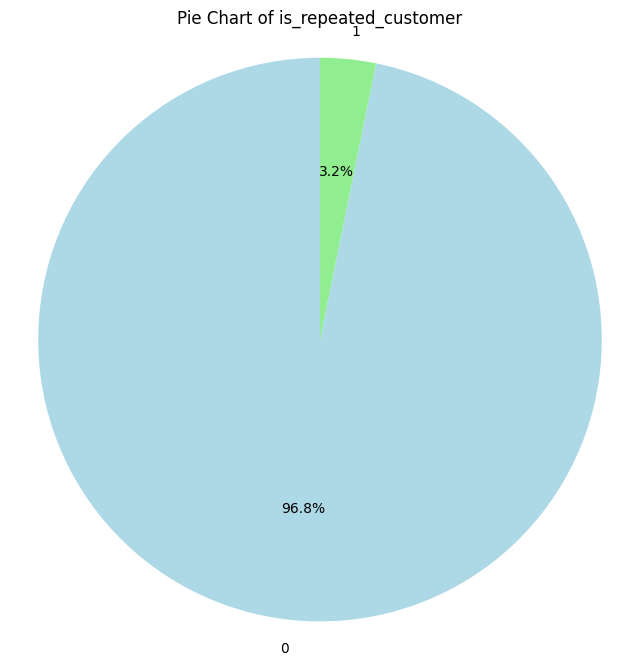

In [ ]:
counts = df['is_repeated_customer'].value_counts()
# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
plt.title('Pie Chart of is_repeated_customer')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

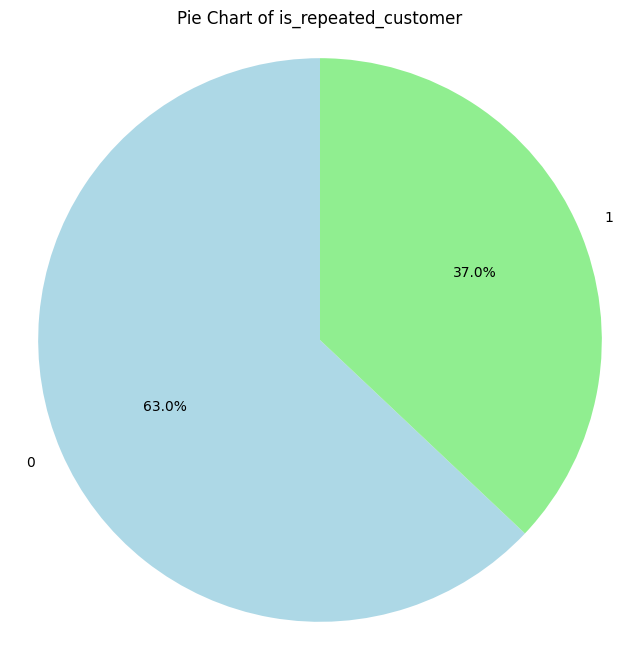

In [ ]:
count = df['is_canceled'].value_counts()
# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(count, labels=count.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
plt.title('Pie Chart of is_repeated_customer')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

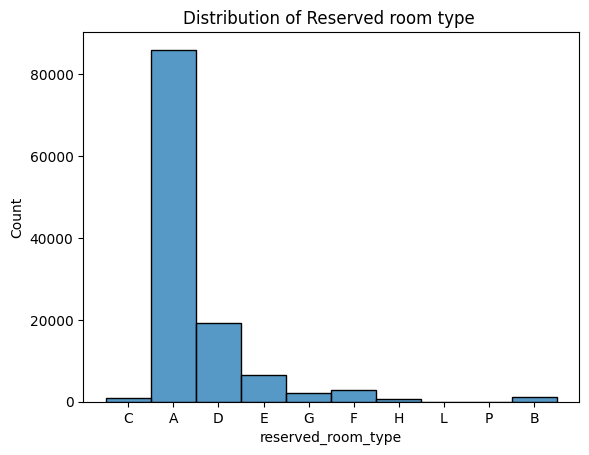

In [ ]:
sns.histplot(data=df, x="reserved_room_type", binwidth= 1)
plt.title('Distribution of Reserved room type ')
plt.show()

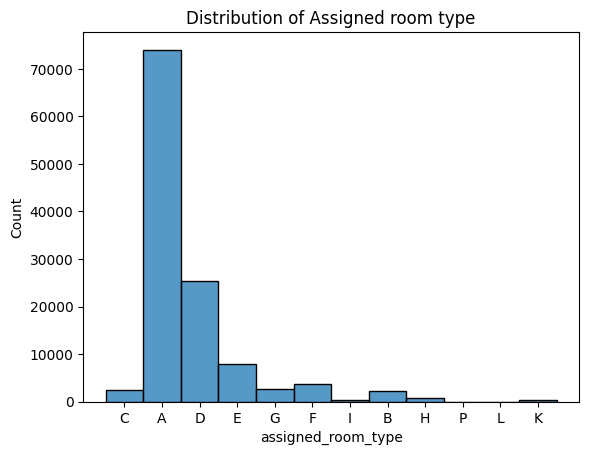

In [ ]:
sns.histplot(data=df, x="assigned_room_type", binwidth= 1)
plt.title('Distribution of Assigned room type')
plt.show()

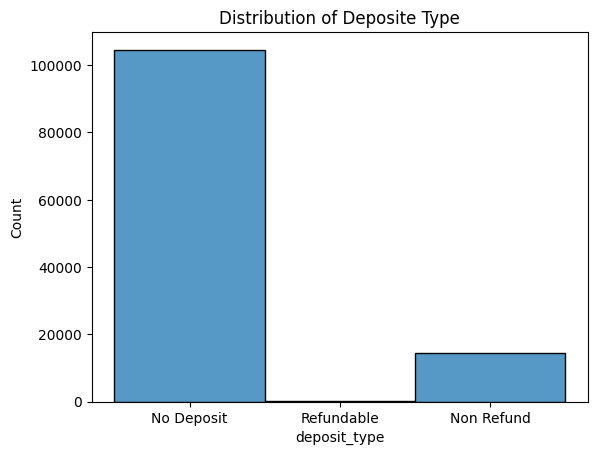

In [ ]:
sns.histplot(data=df, x="deposit_type", binwidth= 1)
plt.title('Distribution of Deposite Type')
plt.show()

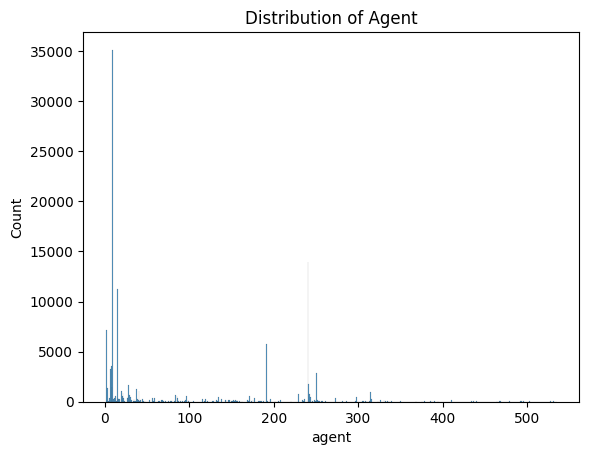

In [ ]:
sns.histplot(data=df, x="agent", binwidth= 1)
plt.title('Distribution of Agent')
plt.show()

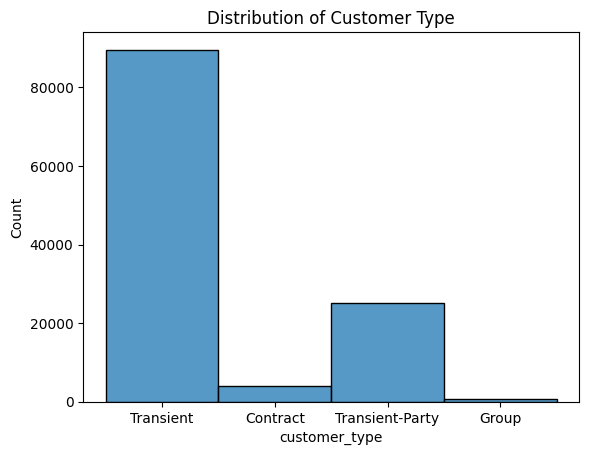

In [ ]:
sns.histplot(data=df, x="customer_type", binwidth= 15)
plt.title('Distribution of Customer Type')
plt.show()

# Create frequency chart for each numerical variable


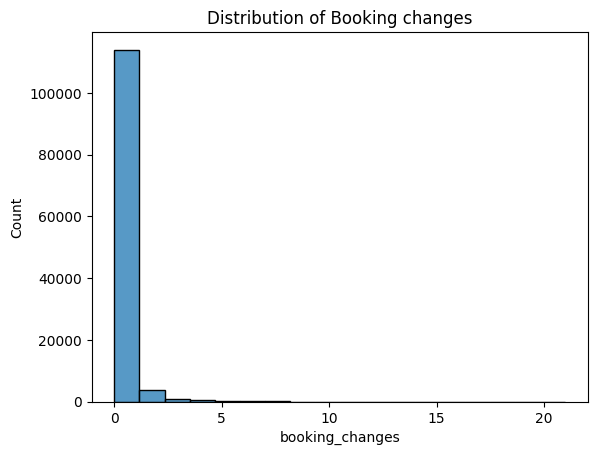

In [ ]:
sns.histplot(data=df, x="booking_changes")
plt.title('Distribution of Booking changes')
plt.show()

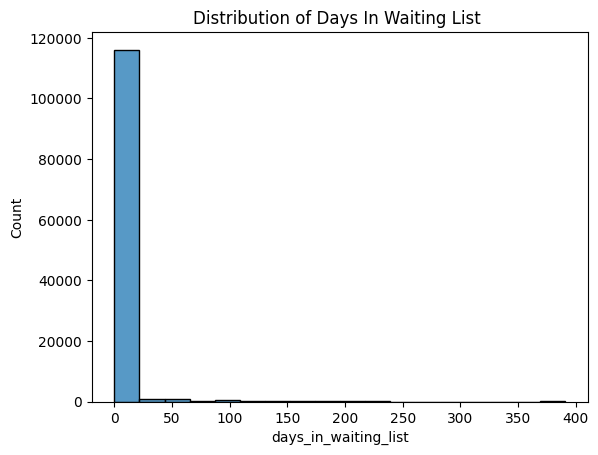

In [ ]:
sns.histplot(data=df, x="days_in_waiting_list")
plt.title('Distribution of Days In Waiting List ')
plt.show()

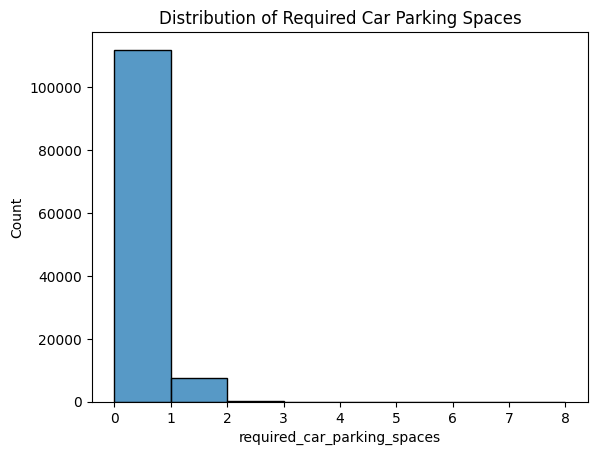

In [ ]:
sns.histplot(data=df, x="required_car_parking_spaces", binwidth= 1)
plt.title('Distribution of Required Car Parking Spaces')
plt.show()

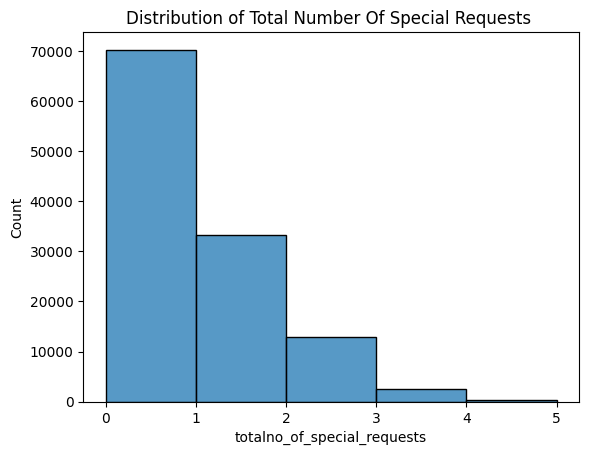

In [ ]:
sns.histplot(data=df, x="totalno_of_special_requests", binwidth= 1)
plt.title('Distribution of Total Number Of Special Requests ')
plt.show()

In [ ]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(df[z]) # length of the column
    plt.figure(figsize=(15,5))
    ax = sns.countplot(df[z],palette='Paired')
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot

        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage
    plt.show() # show the plot


<Axes: xlabel='is_repeated_customer', ylabel='Count'>

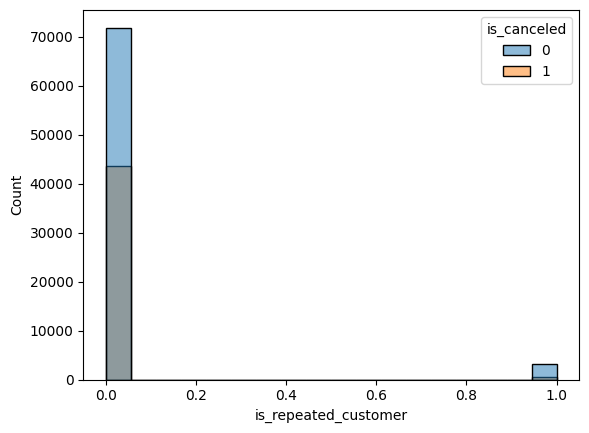

In [ ]:
colors = sns.color_palette('pastel')[0:5]

sns.histplot(data=df, x="is_repeated_customer", hue= 'is_canceled')

In [ ]:
df['is_repeated_customer'].value_counts()

is_repeated_customer
0    115580
1      3810
Name: count, dtype: int64

In [ ]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set()
    ## crosstab
    tab1 = pd.crosstab(x,df['is_canceled'],margins=True)
    print(tab1)
    print('-'*120)
    ## visualising the cross tab
    tab = pd.crosstab(x,df['is_canceled'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

In [ ]:
def stacked_plot(x):
    sns.set()
    ## crosstab
    tab1 = pd.crosstab(x, df['is_canceled'], margins=True)
    print(tab1)
    print('-'*120)

    ## visualising the cross tab
    tab = pd.crosstab(x, df['is_canceled'], normalize='index')
    ax = tab.plot(kind='bar', stacked=True, figsize=(20, 10))

    # Rotate x-axis labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()


is_canceled      0      1     All
hotel                            
type_1       46228  33102   79330
type_2       28938  11122   40060
All          75166  44224  119390
------------------------------------------------------------------------------------------------------------------------


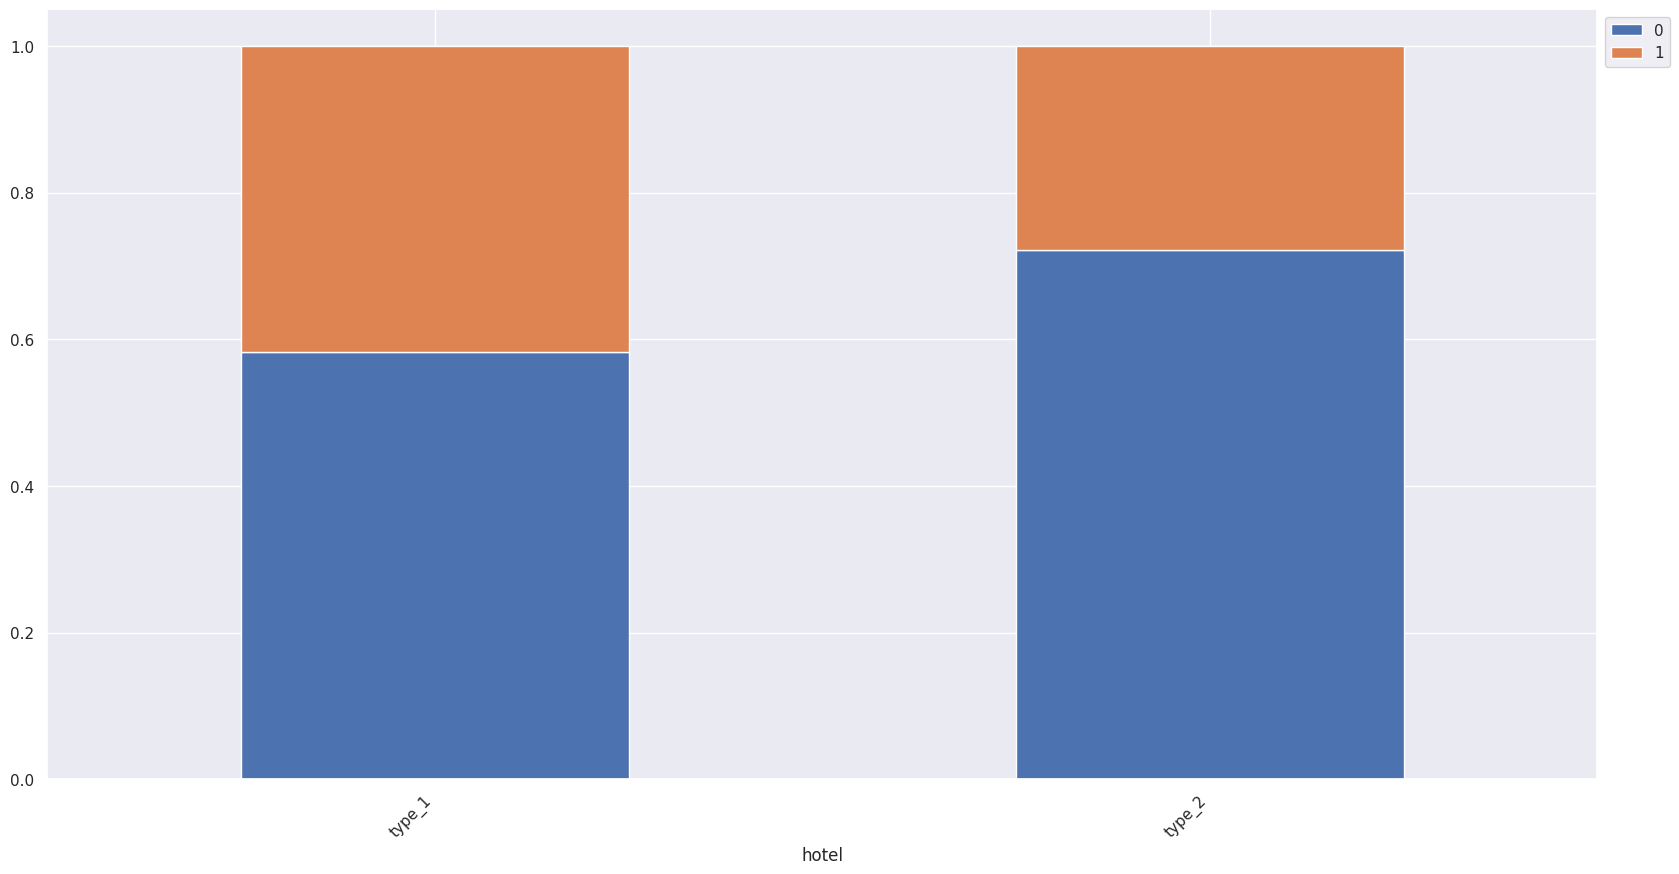

In [ ]:
stacked_plot(df['hotel'])

is_canceled      0      1     All
country                          
ABW              2      0       2
AGO            157    205     362
AIA              1      0       1
ALB             10      2      12
AND              2      5       7
...            ...    ...     ...
VNM              6      2       8
ZAF             49     31      80
ZMB              1      1       2
ZWE              2      2       4
All          75166  44224  119390

[178 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


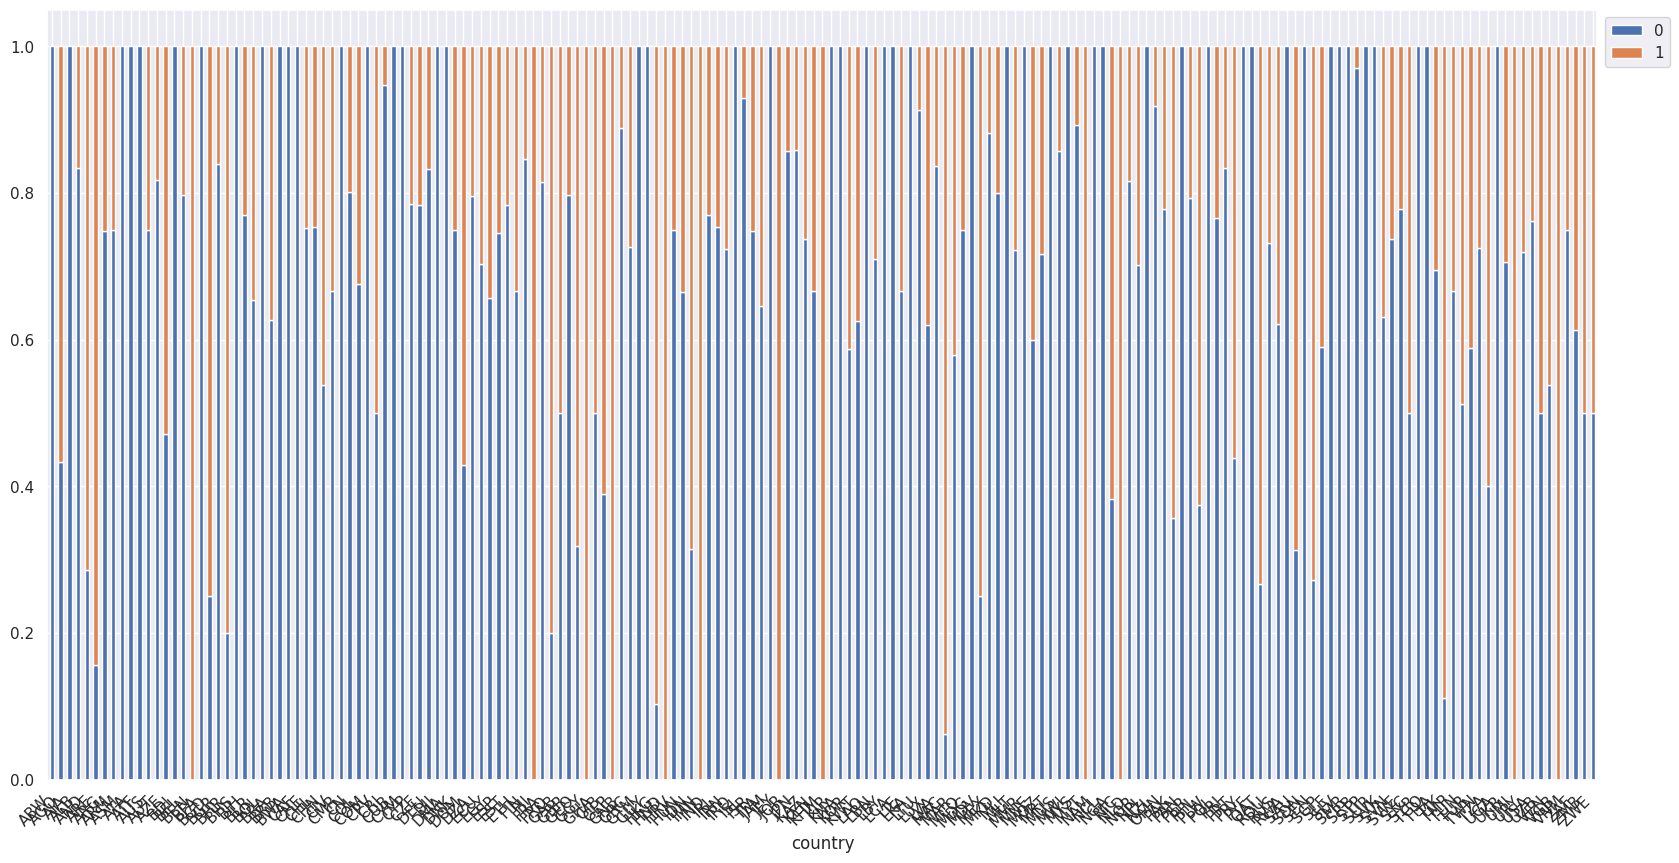

In [ ]:
stacked_plot(df['country'])

is_canceled                          0      1     All
market_segment                                       
Aviation                           185     52     237
Complementary                      646     97     743
Corporate                         4303    992    5295
Direct                           10672   1934   12606
Groups                            7714  12097   19811
Offline Travel Agents/Operators  15908   8311   24219
Online Travel Agents             35738  20741   56479
All                              75166  44224  119390
------------------------------------------------------------------------------------------------------------------------


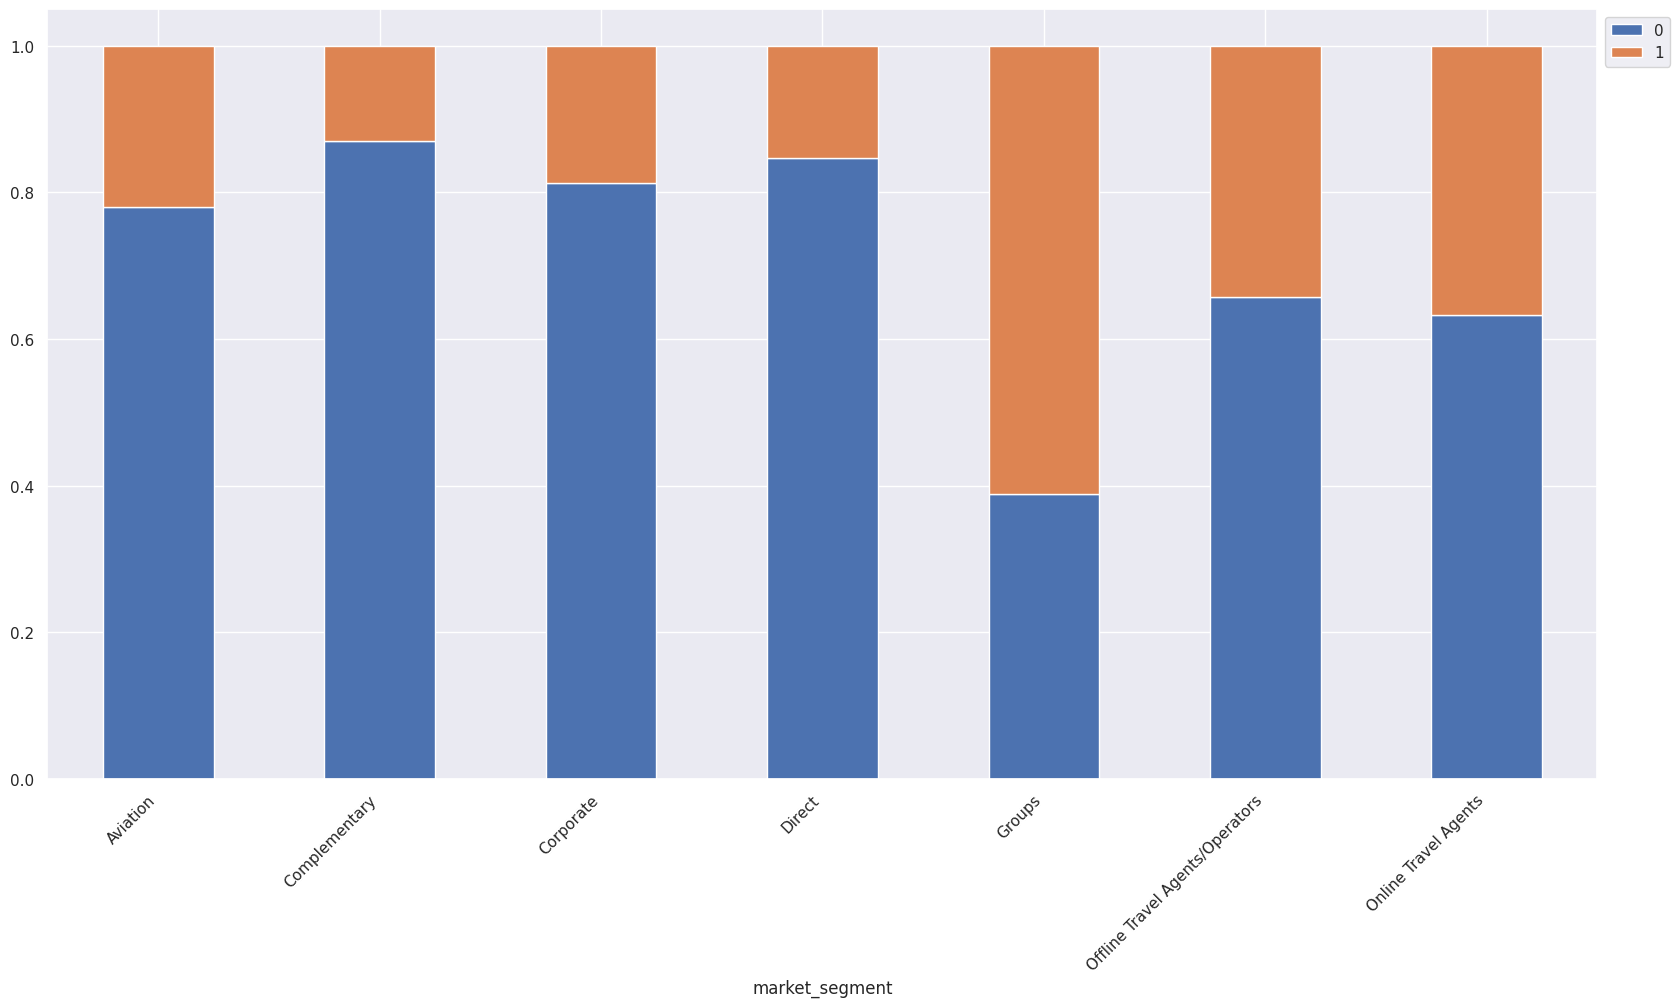

In [ ]:
stacked_plot(df['market_segment'])

is_canceled               0      1     All
distribution_channel                      
Corporate              5203   1474    6677
Direct                12088   2557   14645
GDS                     156     37     193
TA/TO                 57719  40156   97875
All                   75166  44224  119390
------------------------------------------------------------------------------------------------------------------------


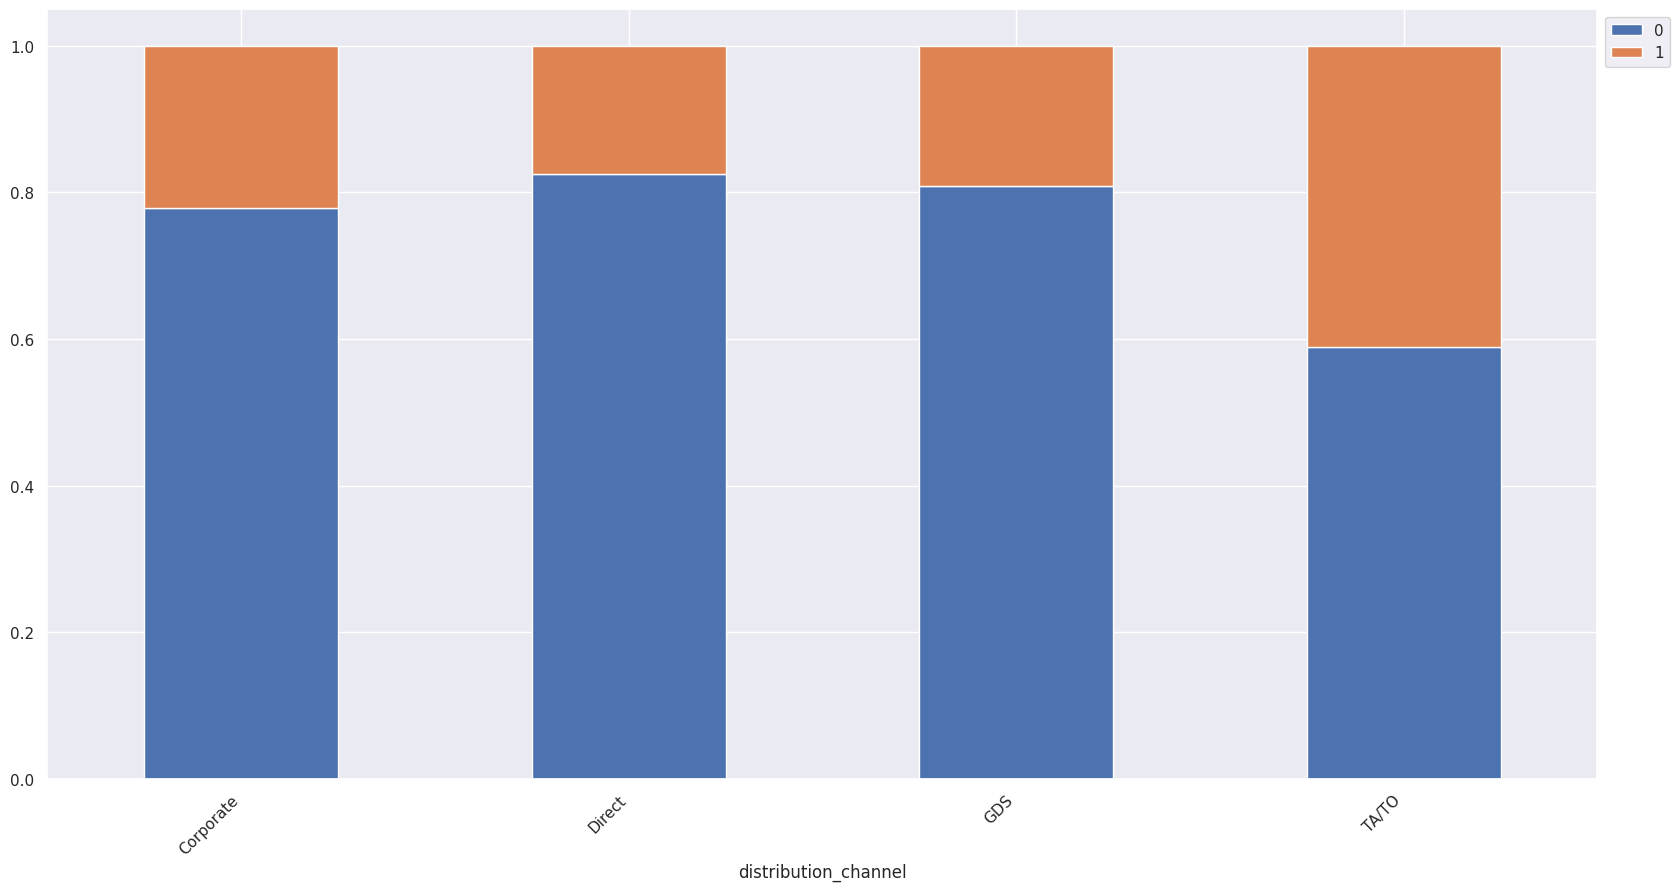

In [ ]:
stacked_plot(df['distribution_channel'])

is_canceled               0      1     All
is_repeated_customer                      
0                     71908  43672  115580
1                      3258    552    3810
All                   75166  44224  119390
------------------------------------------------------------------------------------------------------------------------


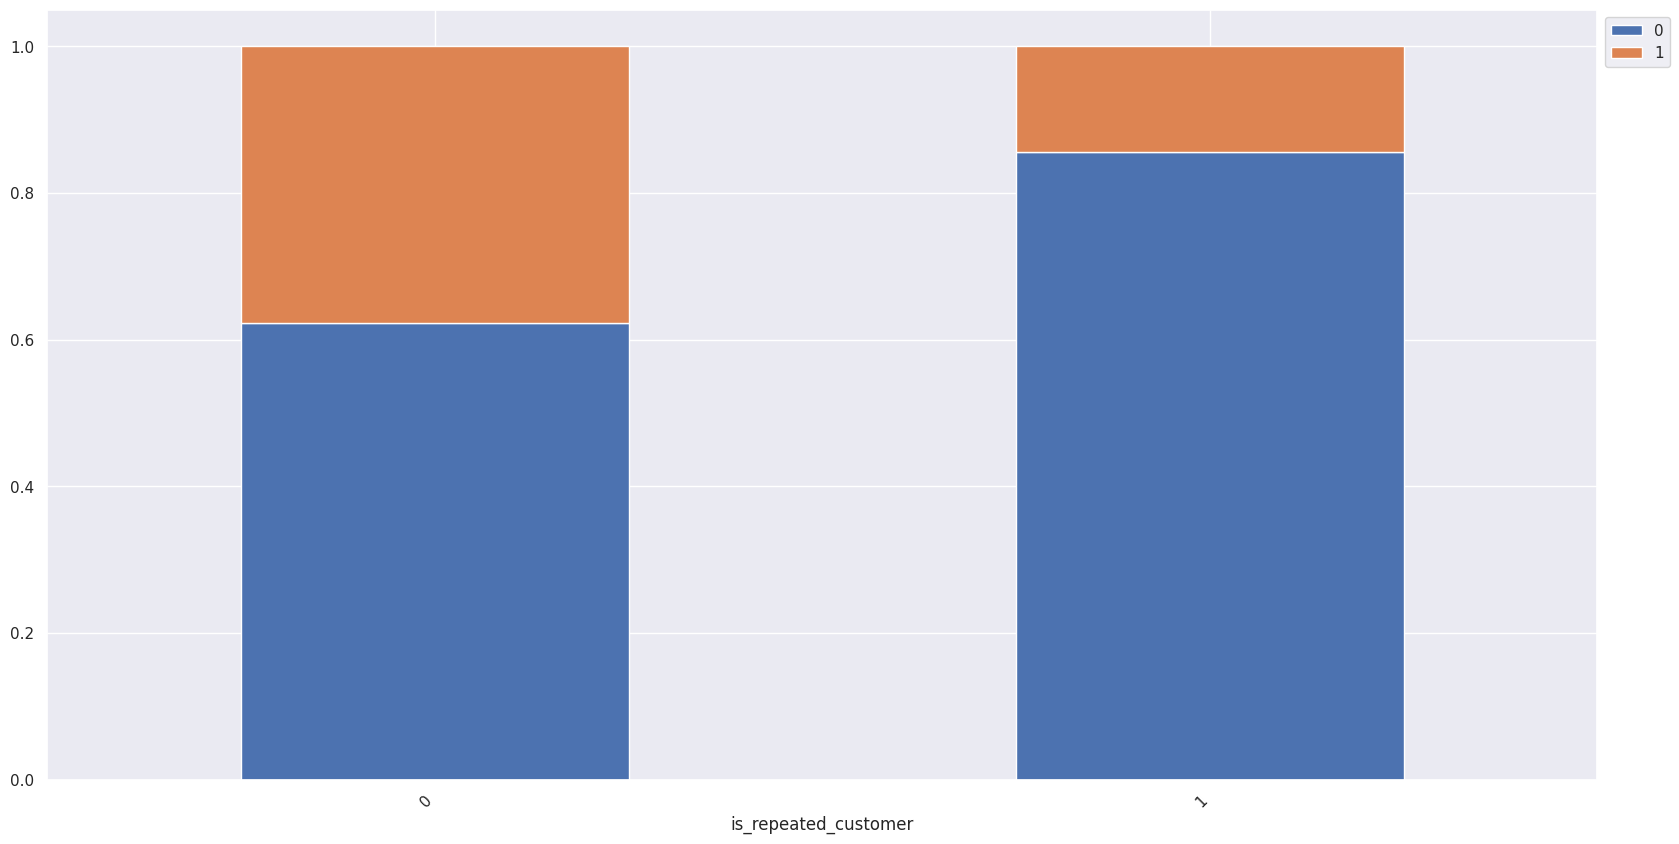

In [ ]:
stacked_plot(df['is_repeated_customer'])

is_canceled             0      1     All
reserved_room_type                      
A                   52364  33630   85994
B                     750    368    1118
C                     624    308     932
D                   13099   6102   19201
E                    4621   1914    6535
F                    2017    880    2897
G                    1331    763    2094
H                     356    245     601
L                       4      2       6
P                       0     12      12
All                 75166  44224  119390
------------------------------------------------------------------------------------------------------------------------


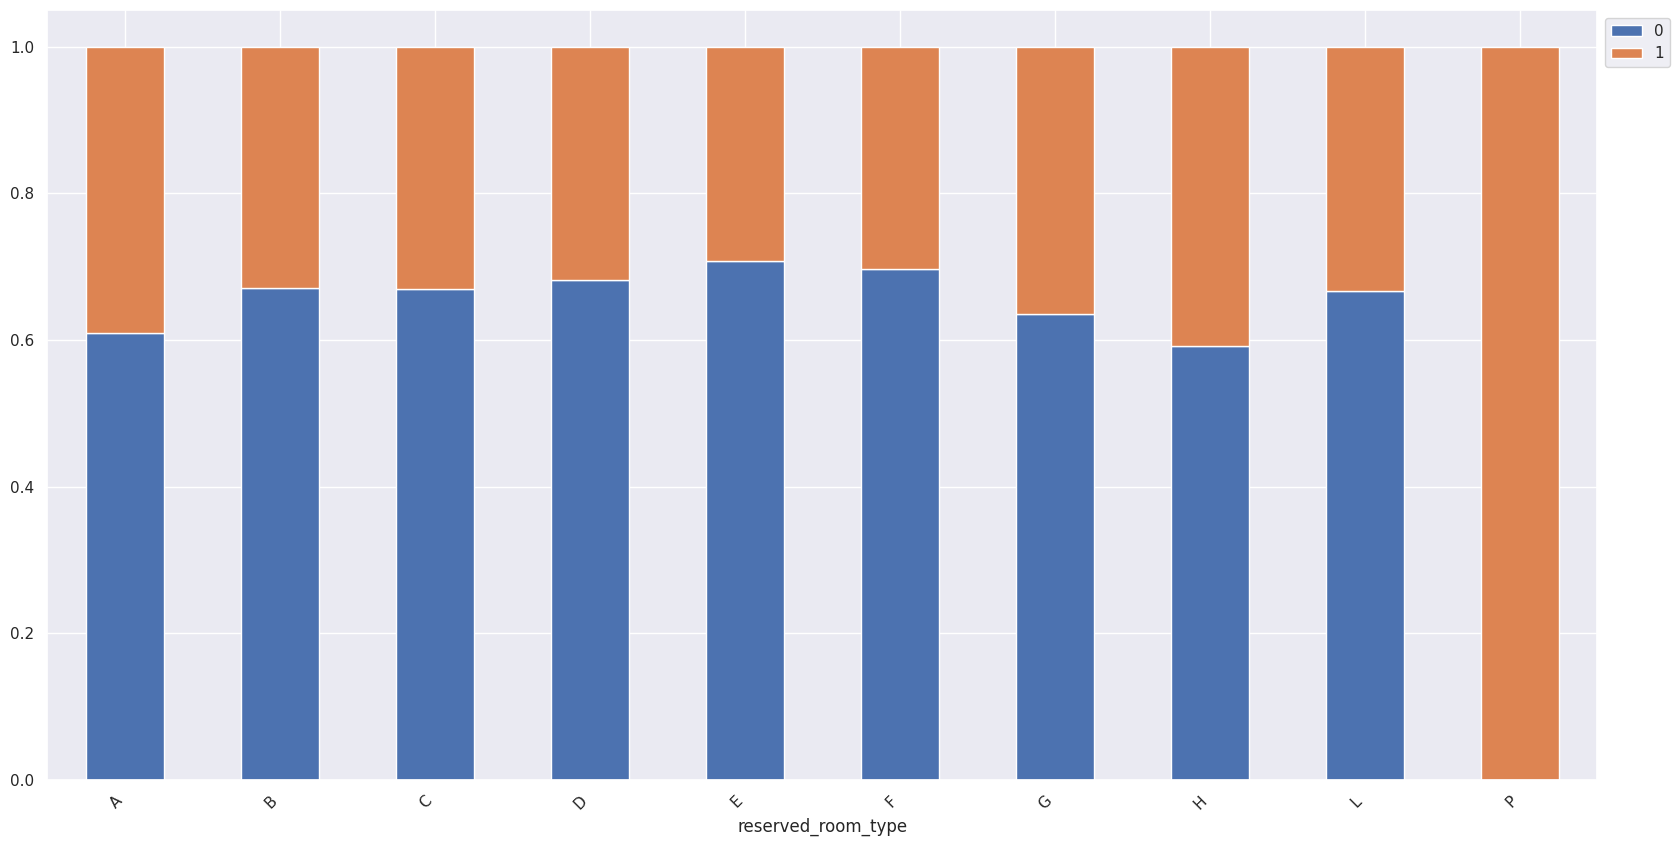

In [ ]:
stacked_plot(df['reserved_room_type'])

is_canceled             0      1     All
assigned_room_type                      
A                   41105  32948   74053
B                    1651    512    2163
C                    1929    446    2375
D                   18960   6362   25322
E                    5838   1968    7806
F                    2824    927    3751
G                    1773    780    2553
H                     461    251     712
I                     358      5     363
K                     267     12     279
L                       0      1       1
P                       0     12      12
All                 75166  44224  119390
------------------------------------------------------------------------------------------------------------------------


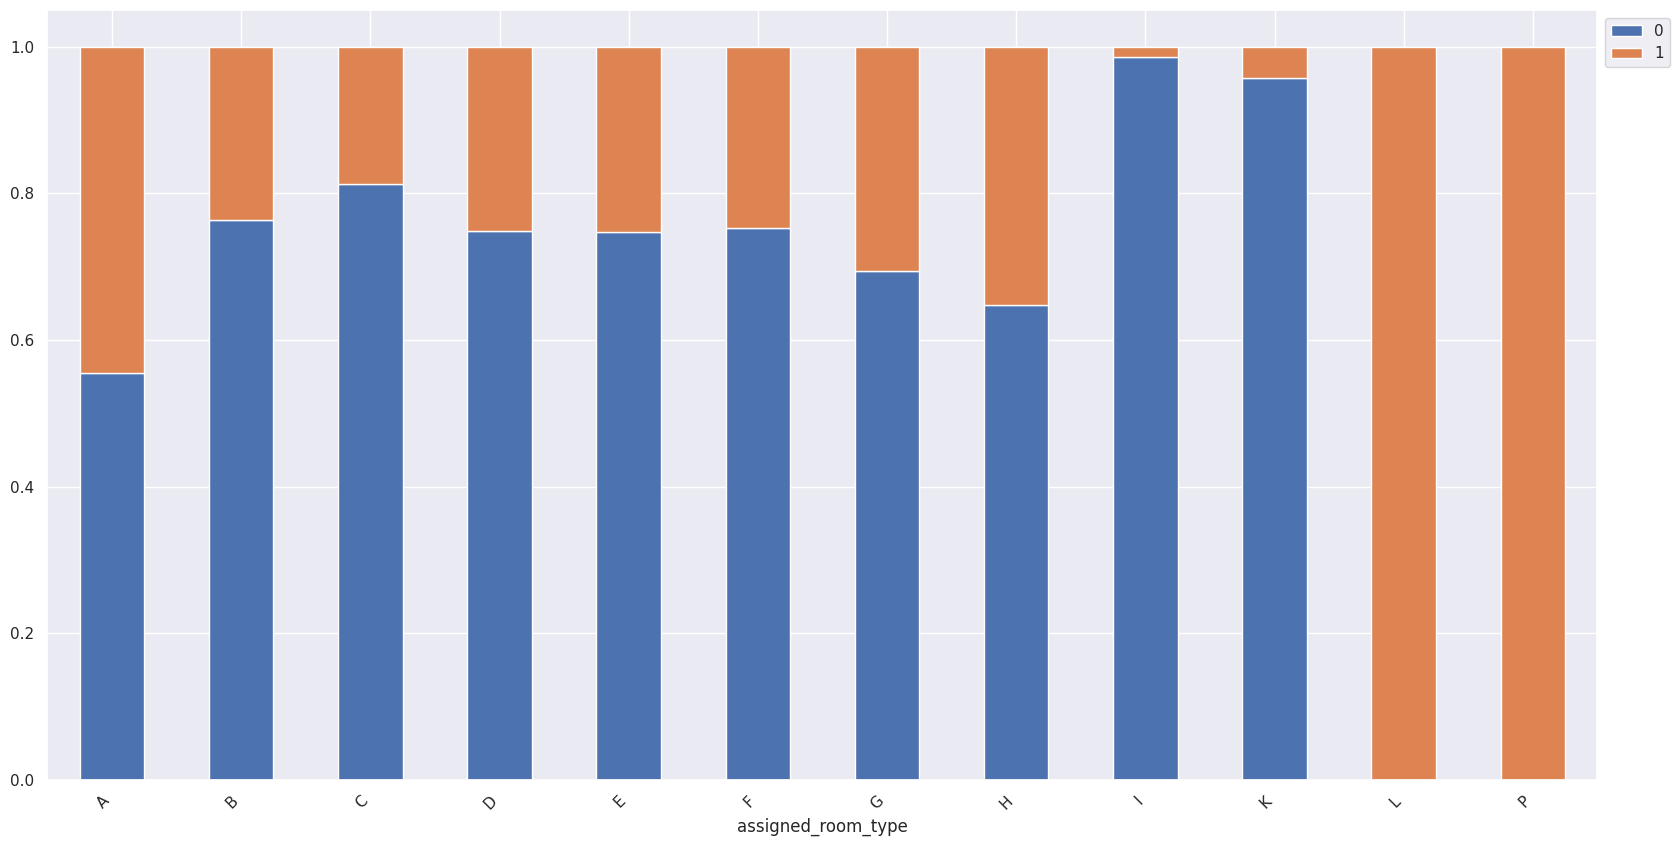

In [ ]:
stacked_plot(df['assigned_room_type'])

is_canceled       0      1     All
deposit_type                      
No Deposit    74947  29694  104641
Non Refund       93  14494   14587
Refundable      126     36     162
All           75166  44224  119390
------------------------------------------------------------------------------------------------------------------------


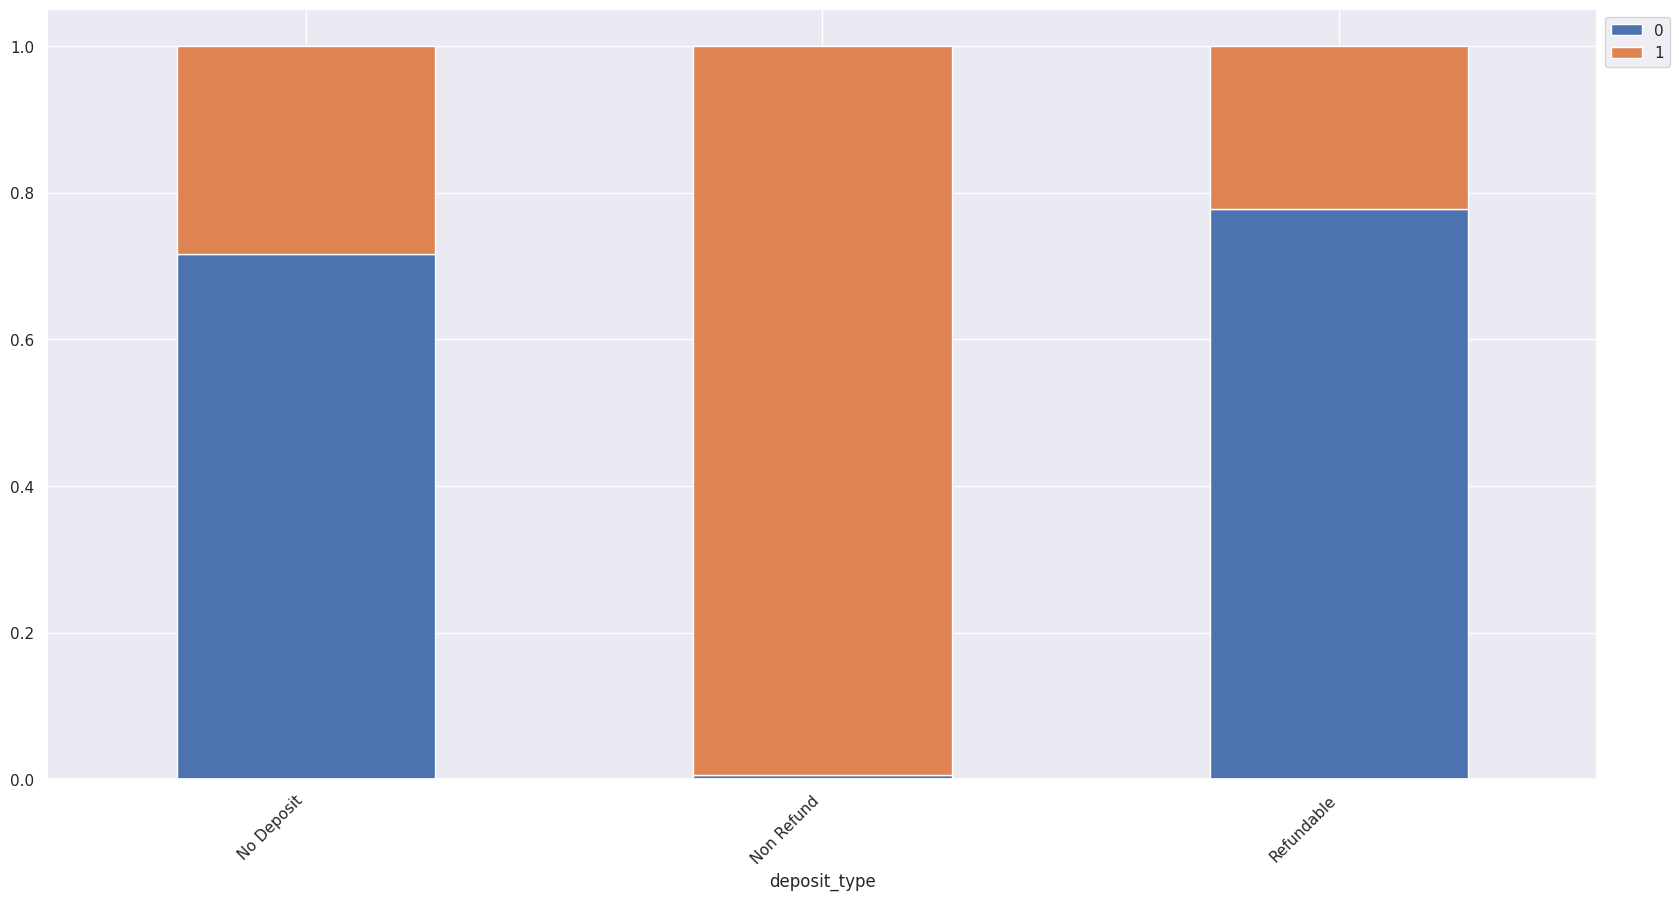

In [ ]:
stacked_plot(df['deposit_type'])

is_canceled      0      1     All
agent                            
1.0           1911   5280    7191
2.0            128     34     162
3.0            565    771    1336
4.0             16     31      47
5.0            181    149     330
...            ...    ...     ...
526.0            9      1      10
527.0           35      0      35
531.0           22     46      68
535.0            3      0       3
All          75166  44224  119390

[334 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


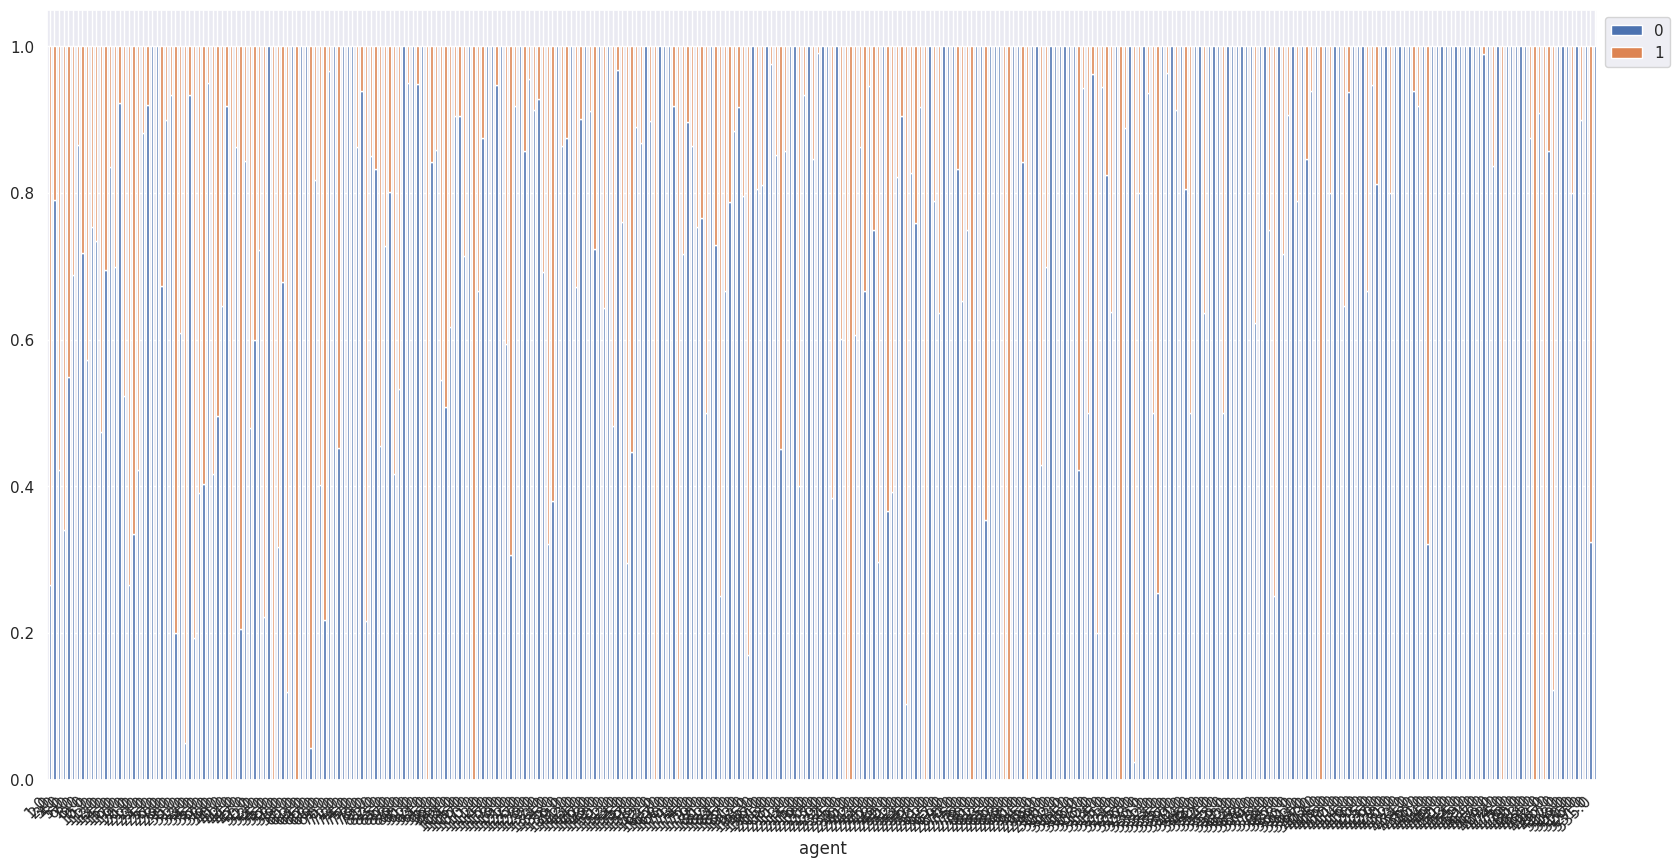

In [ ]:
stacked_plot(df['agent'])

is_canceled          0      1     All
customer_type                        
Contract          2814   1262    4076
Group              518     59     577
Transient        53099  36514   89613
Transient-Party  18735   6389   25124
All              75166  44224  119390
------------------------------------------------------------------------------------------------------------------------


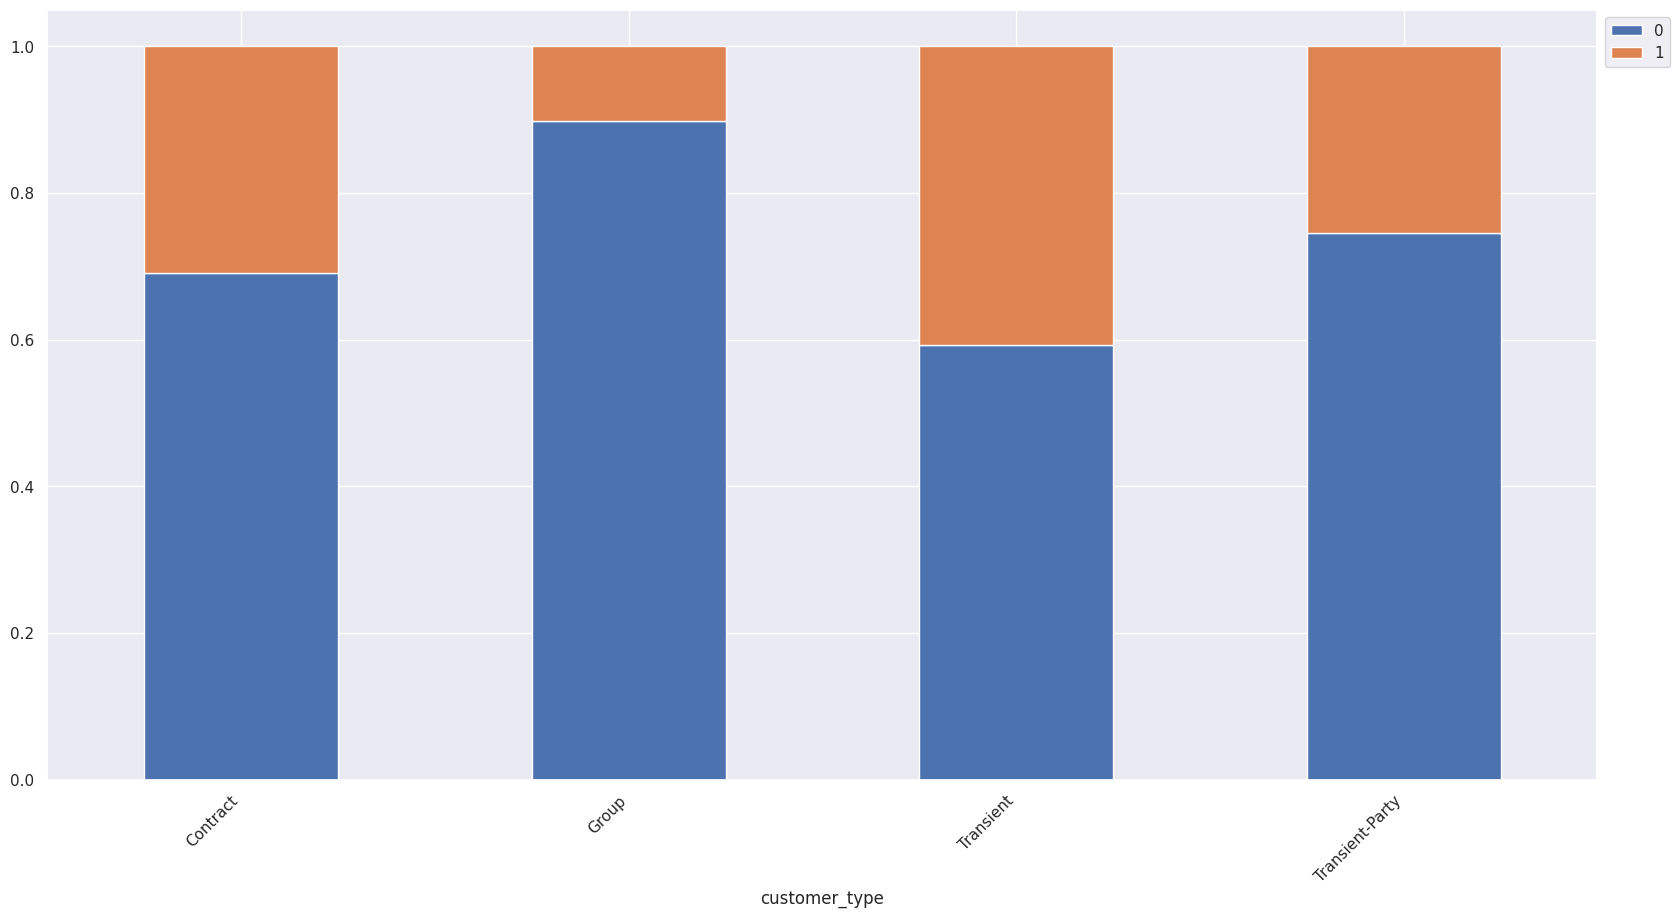

In [ ]:
stacked_plot(df['customer_type'])

is_canceled                      0      1     All
totalno_of_special_requests                      
0                            36762  33556   70318
1                            25908   7318   33226
2                            10103   2866   12969
3                             2051    446    2497
4                              304     36     340
5                               38      2      40
All                          75166  44224  119390
------------------------------------------------------------------------------------------------------------------------


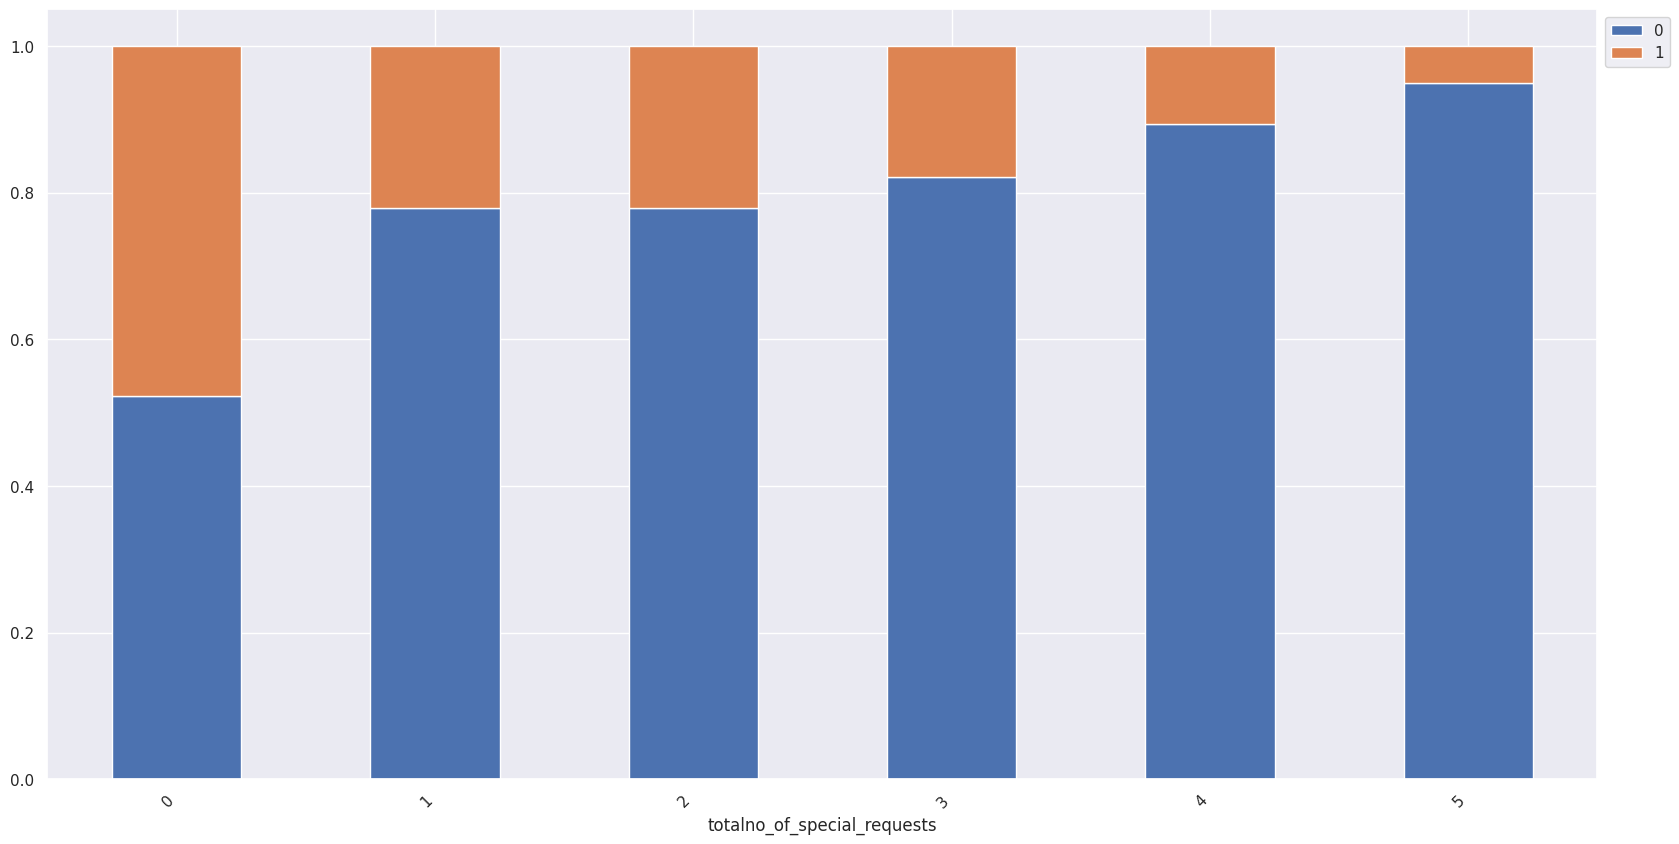

In [ ]:
stacked_plot(df['totalno_of_special_requests'])

In [ ]:
# Creating Histogram and Box Plot
def histogram_boxplot(feature, figsize=(15,5), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)},
                                           figsize = figsize
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet', orient= 'h') # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(feature, kde=F, ax=ax_hist2, bins=bins,color = 'orange') if bins else sns.distplot(feature, kde=False, ax=ax_hist2,color='tab:cyan') # For histogram
    ax_hist2.axvline(np.mean(feature), color='purple', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle=':') # Add median to the histogram

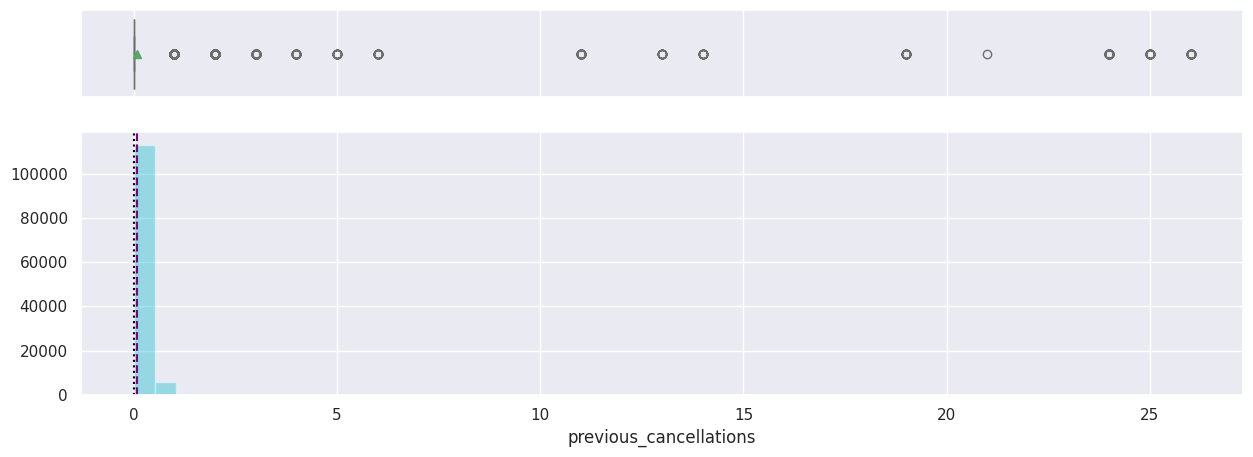

In [ ]:
histogram_boxplot(df['previous_cancellations'])

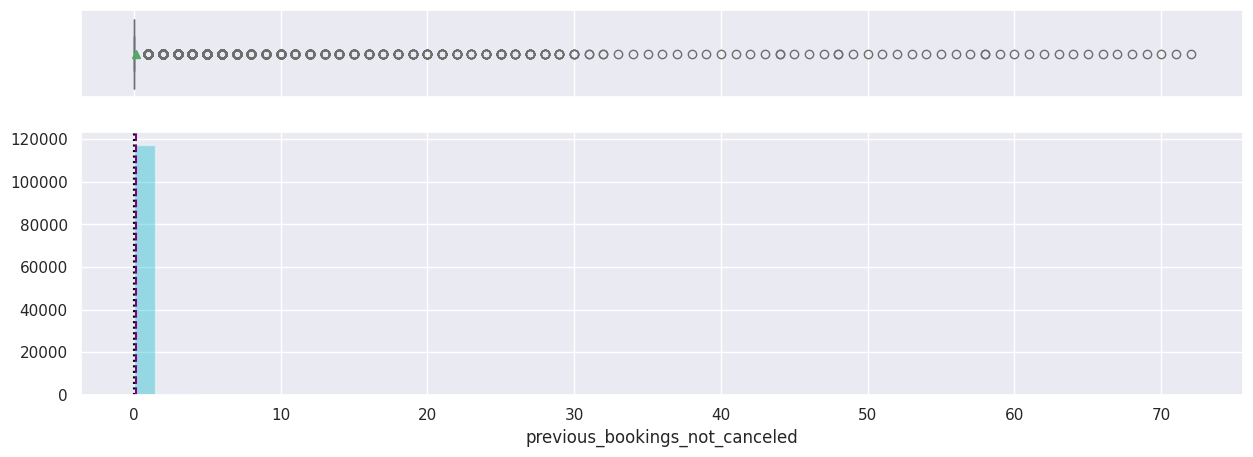

In [ ]:
histogram_boxplot(df['previous_bookings_not_canceled'])

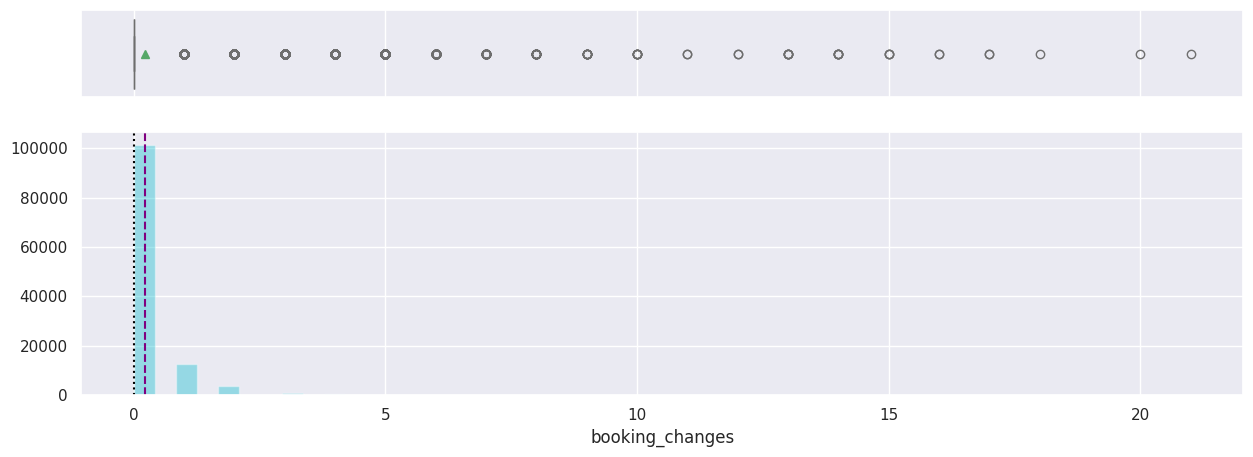

In [ ]:
histogram_boxplot(df['booking_changes'])

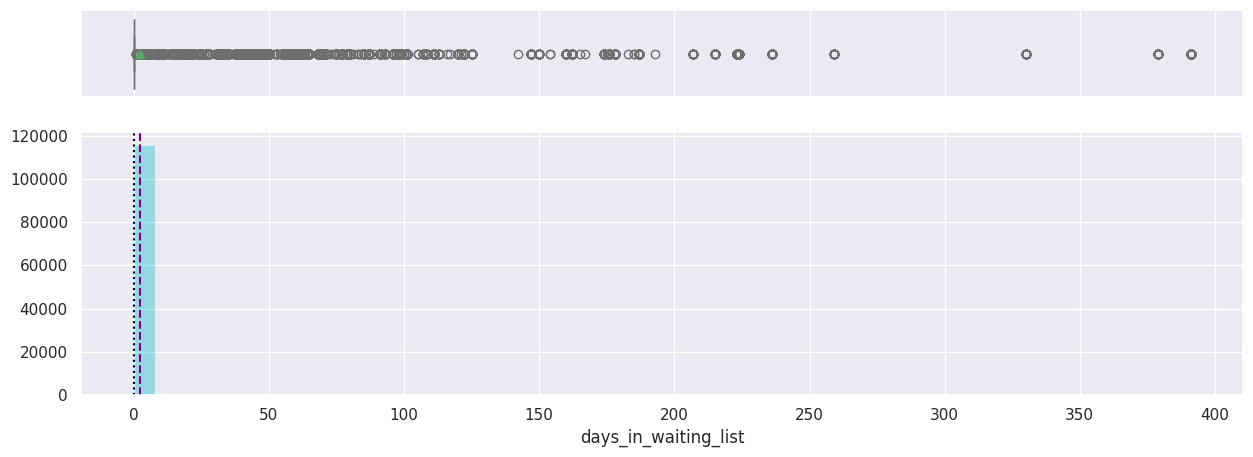

In [ ]:
histogram_boxplot(df['days_in_waiting_list'])

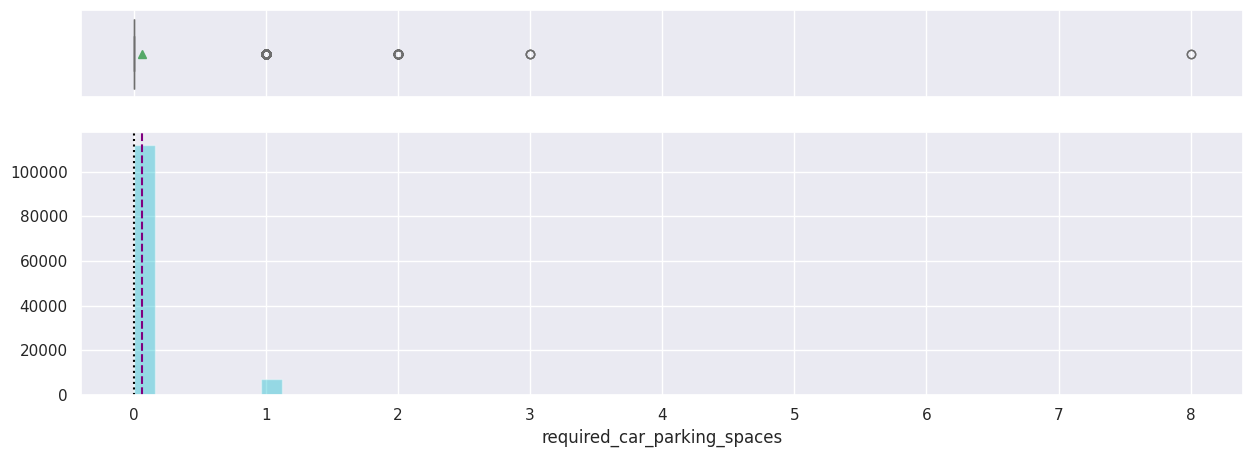

In [ ]:
histogram_boxplot(df['required_car_parking_spaces'])

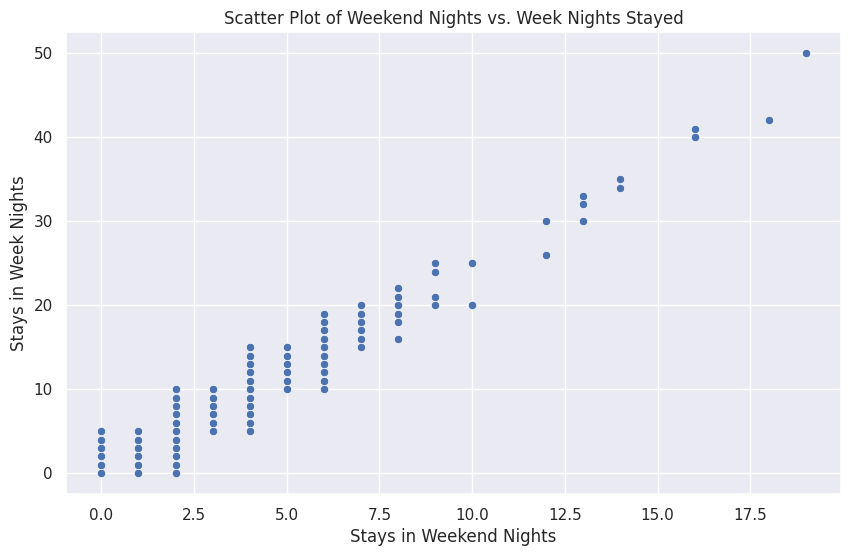

In [ ]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='stays_in_weekend_nights', y='stays_in_week_nights', data=df)
plt.title('Scatter Plot of Weekend Nights vs. Week Nights Stayed')
plt.xlabel('Stays in Weekend Nights')
plt.ylabel('Stays in Week Nights')
plt.show()

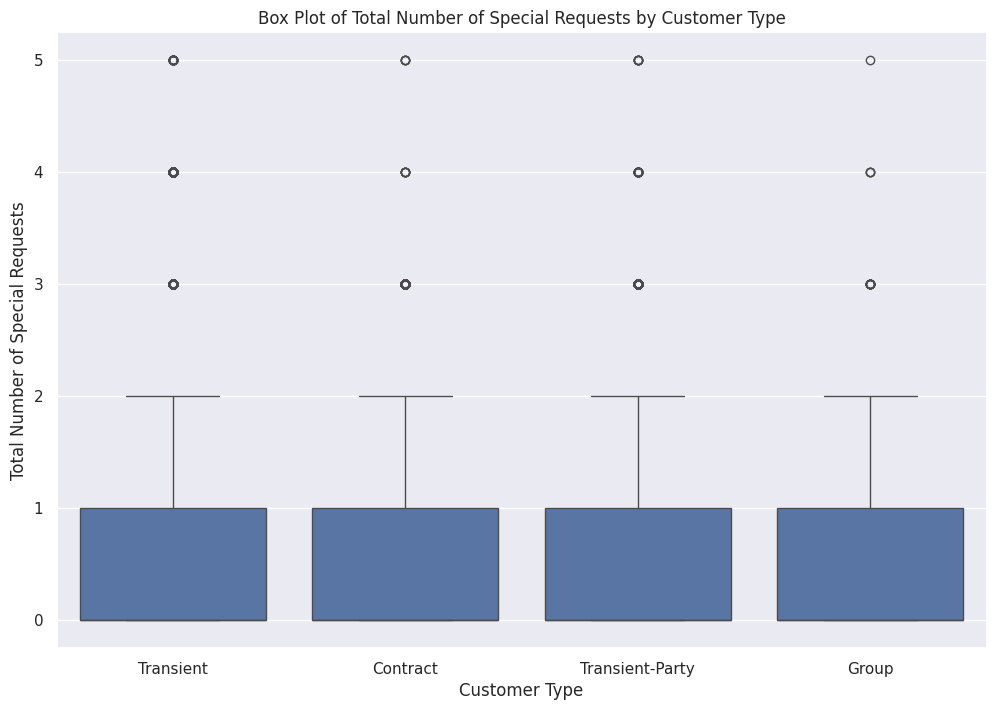

In [ ]:
# Create the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='customer_type', y='totalno_of_special_requests', data=df)
plt.title('Box Plot of Total Number of Special Requests by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Total Number of Special Requests')
plt.show()

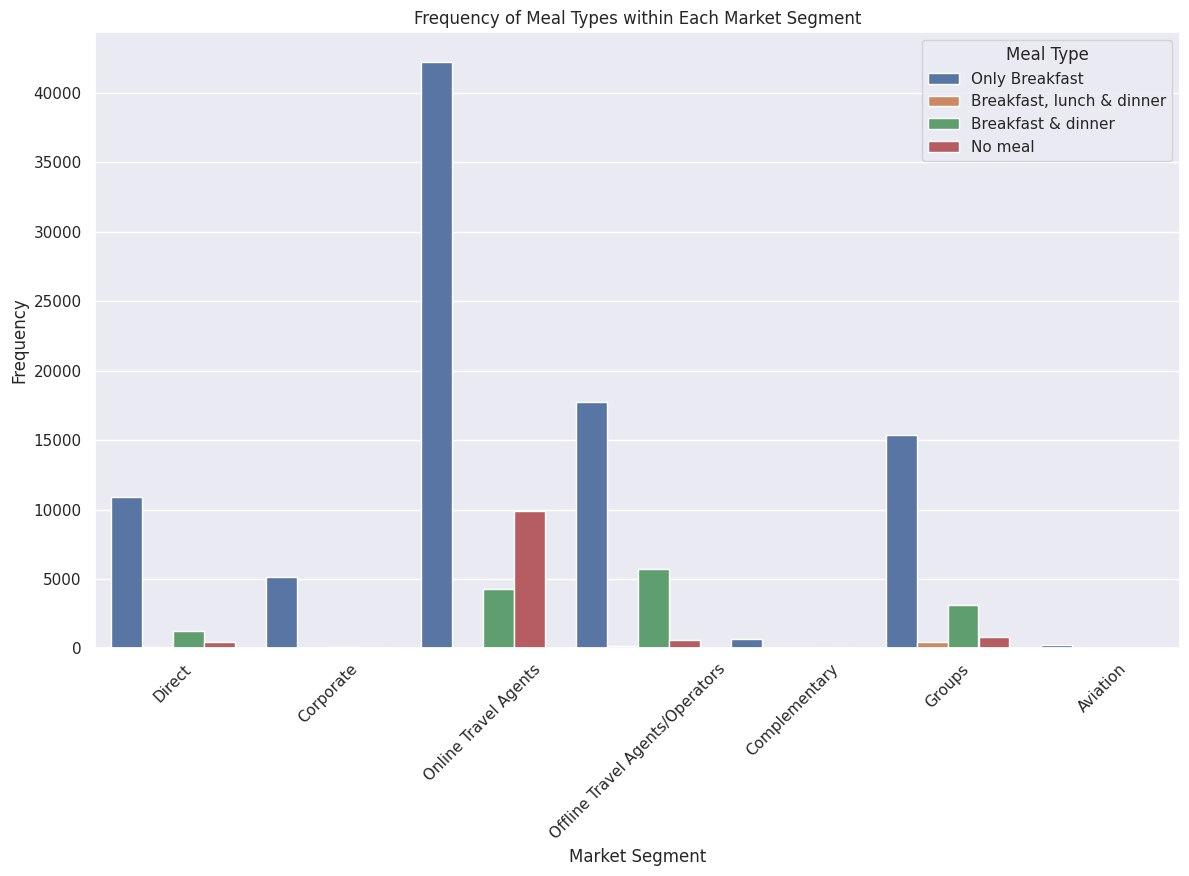

In [ ]:
# Create a bar chart
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='market_segment', hue='meal')
plt.title('Frequency of Meal Types within Each Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Frequency')
plt.legend(title='Meal Type')
plt.xticks(rotation=45)
plt.show()

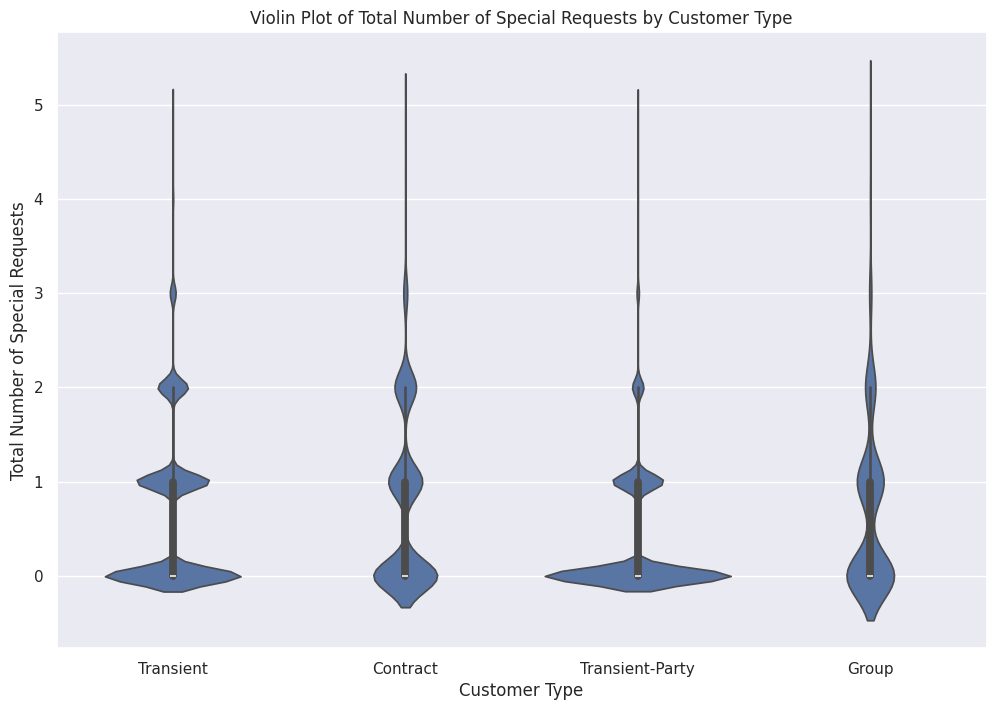

In [ ]:
# Create the violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='customer_type', y='totalno_of_special_requests', data=df)
plt.title('Violin Plot of Total Number of Special Requests by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Total Number of Special Requests')
plt.show()

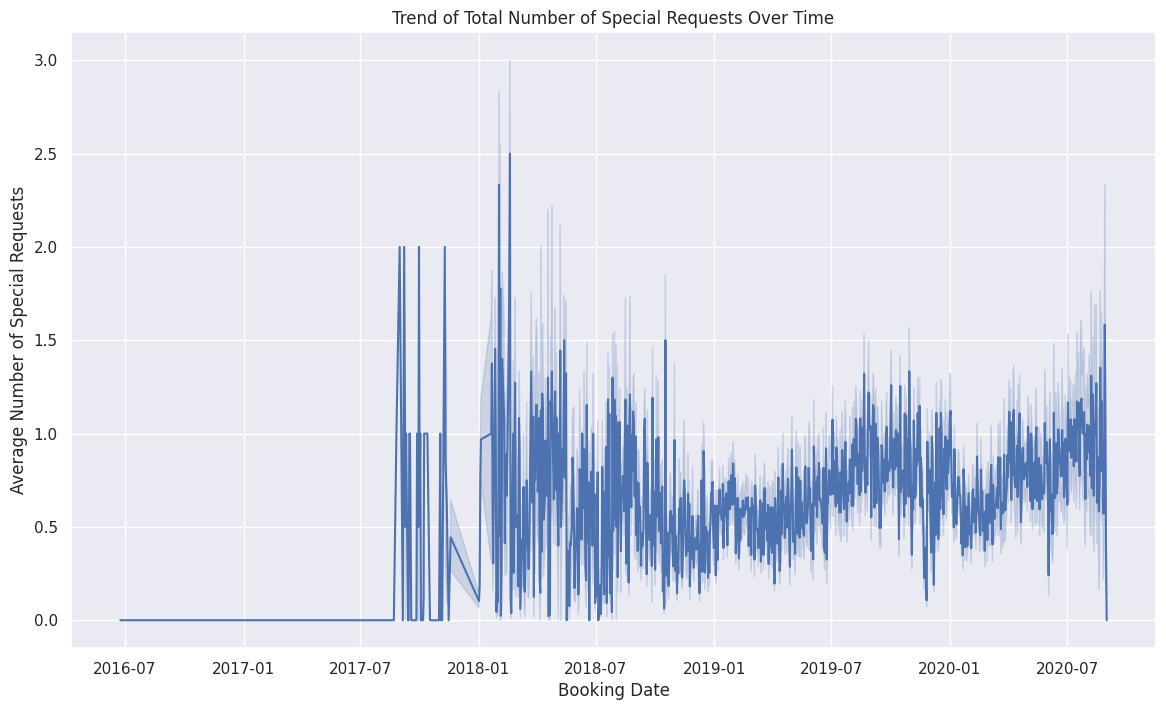

In [ ]:
# Group by booking_date and calculate the mean of totalno_of_special_requests
data_grouped = df.groupby('booking_date')['totalno_of_special_requests'].mean().reset_index()
plt.figure(figsize=(14, 8))
sns.lineplot(x='booking_date', y='totalno_of_special_requests', data=df)
plt.title('Trend of Total Number of Special Requests Over Time')
plt.xlabel('Booking Date')
plt.ylabel('Average Number of Special Requests')
plt.show()

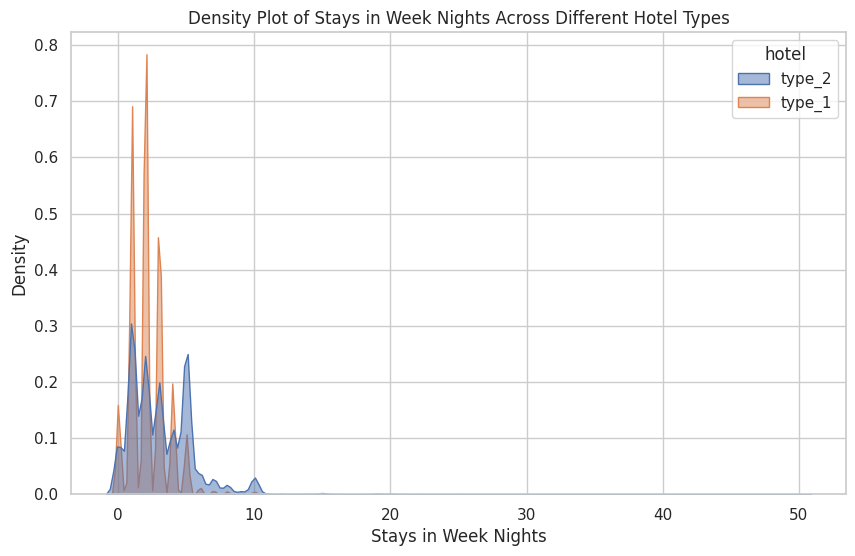

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x="stays_in_week_nights", hue="hotel", fill=True, common_norm=False, alpha=0.5)
plt.title('Density Plot of Stays in Week Nights Across Different Hotel Types')
plt.xlabel('Stays in Week Nights')
plt.ylabel('Density')
plt.show()

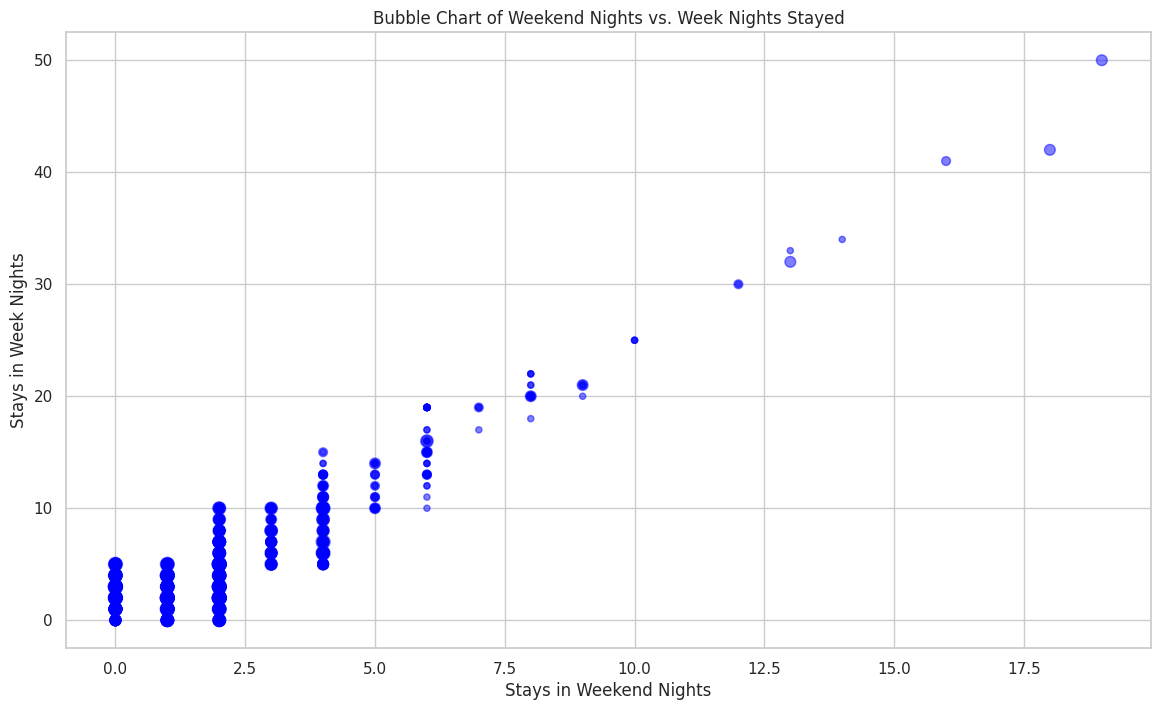

In [ ]:
# Create the bubble chart
plt.figure(figsize=(14, 8))
bubble = plt.scatter(
    x=df['stays_in_weekend_nights'],
    y=df['stays_in_week_nights'],
    s=df['totalno_of_special_requests']*20,  # scale the size for better visualization
    alpha=0.5,
    c='blue')
plt.title('Bubble Chart of Weekend Nights vs. Week Nights Stayed')
plt.xlabel('Stays in Weekend Nights')
plt.ylabel('Stays in Week Nights')
plt.show()

# Multivariate Analysis

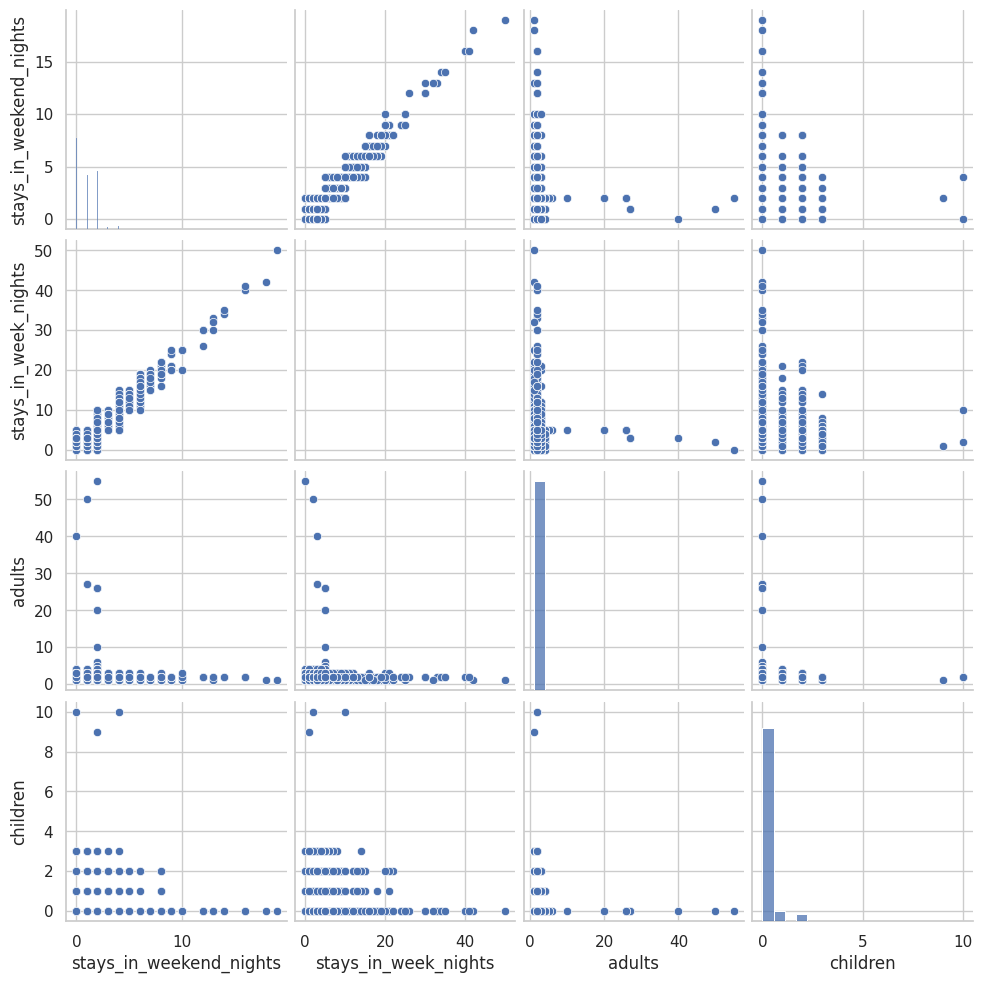

In [ ]:
sns.pairplot(df[['stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children']], palette="rocket")
plt.show()

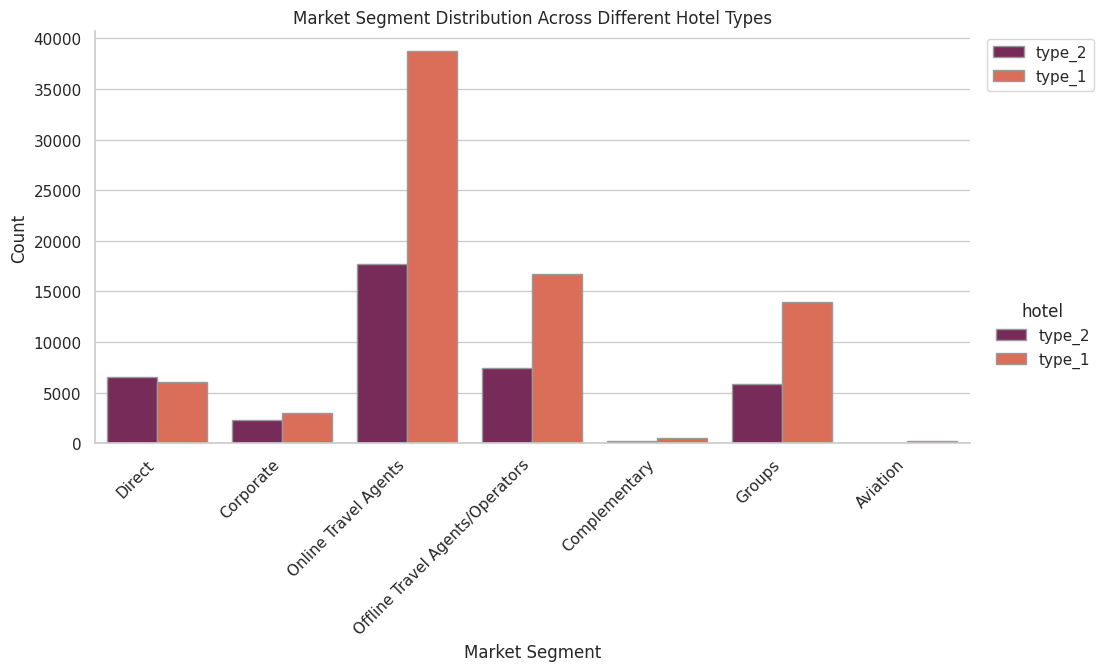

In [ ]:
sns.set(style="whitegrid")
# Create a grouped bar chart
g = sns.catplot(
    data=df,
    kind="count",
    x="market_segment",
    hue="hotel",
    palette="rocket",
    edgecolor=".6",
    height=5,
    aspect=2
)
# Rotate x-axis labels for better readability
g.set_xticklabels(rotation=45, ha='right')
# Adjust the legend
plt.legend(loc="upper right", bbox_to_anchor=(1.15, 1))
# Set the title and labels
plt.title("Market Segment Distribution Across Different Hotel Types")
plt.xlabel("Market Segment")
plt.ylabel("Count")
# Show the plot
plt.show()

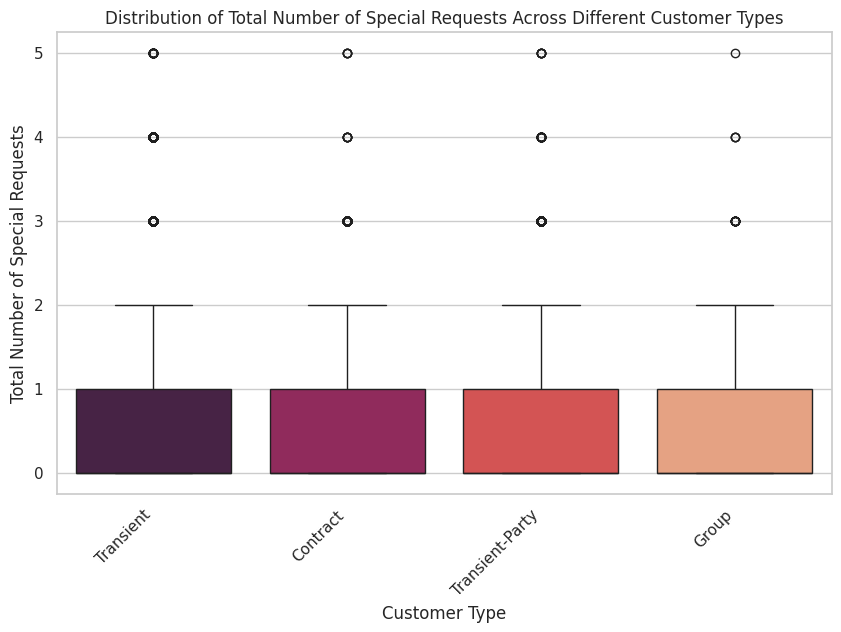

In [ ]:
sns.set(style="whitegrid")
# Create a box plot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(
    data=df,
    x="customer_type",
    y="totalno_of_special_requests",
    palette="rocket"
)
# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Set the title and labels
plt.title("Distribution of Total Number of Special Requests Across Different Customer Types")
plt.xlabel("Customer Type")
plt.ylabel("Total Number of Special Requests")

# Show the plot
plt.show()


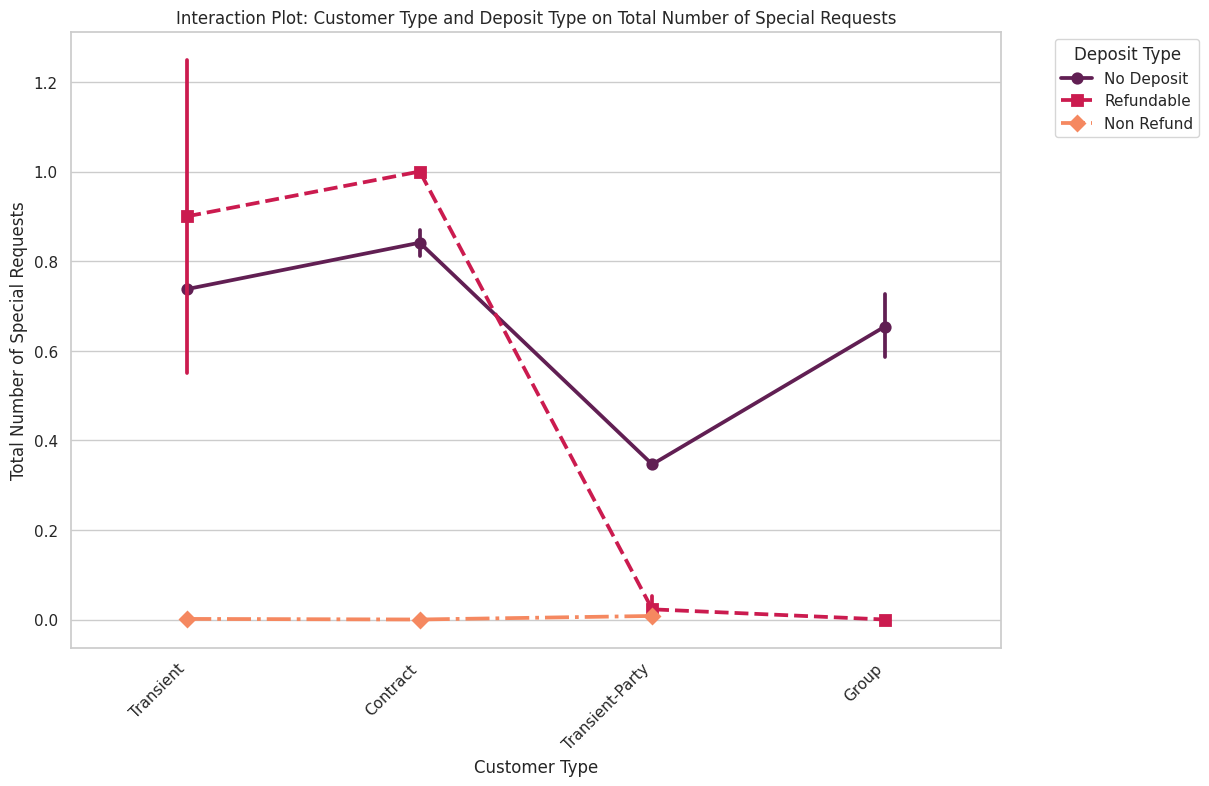

In [ ]:
# Assuming df is your dataset
sns.set(style="whitegrid")

# Create the interaction plot
plt.figure(figsize=(12, 8))
ax = sns.pointplot(
    data=df,
    x="customer_type",
    y="totalno_of_special_requests",
    hue="deposit_type",
    palette="rocket",
    markers=["o", "s", "D"],
    linestyles=["-", "--", "-."]
)

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Set the title and labels
plt.title("Interaction Plot: Customer Type and Deposit Type on Total Number of Special Requests")
plt.xlabel("Customer Type")
plt.ylabel("Total Number of Special Requests")
plt.legend(title='Deposit Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


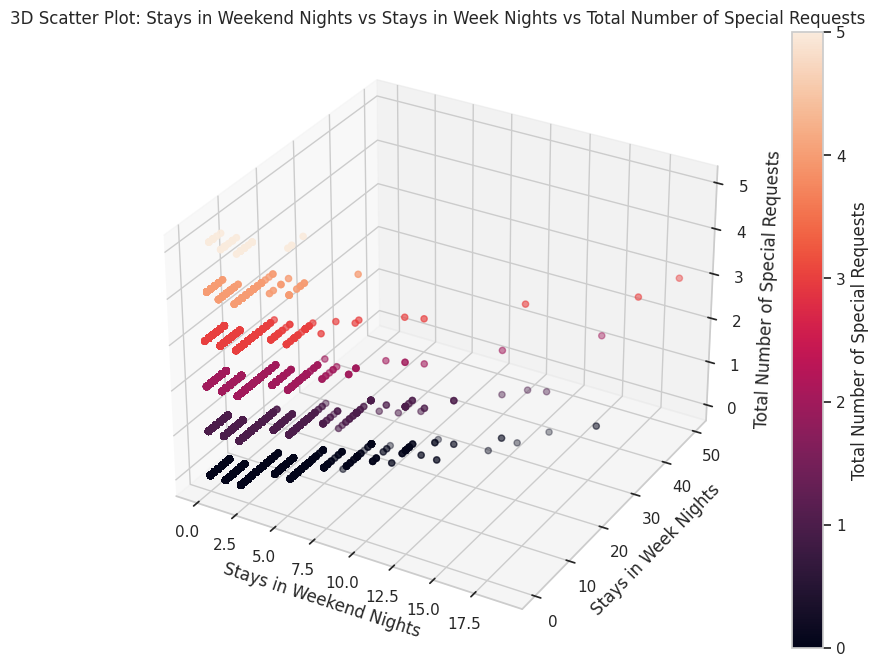

In [ ]:
# Assuming df is your dataset
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
sc = ax.scatter(
    df['stays_in_weekend_nights'],
    df['stays_in_week_nights'],
    df['totalno_of_special_requests'],
    c=df['totalno_of_special_requests'],  # Color by total_of_special_requests
    cmap='rocket',
    marker='o'
)

# Set labels
ax.set_xlabel('Stays in Weekend Nights')
ax.set_ylabel('Stays in Week Nights')
ax.set_zlabel('Total Number of Special Requests')

# Set title
ax.set_title('3D Scatter Plot: Stays in Weekend Nights vs Stays in Week Nights vs Total Number of Special Requests')

# Add color bar
cbar = plt.colorbar(sc)
cbar.set_label('Total Number of Special Requests')

# Show plot
plt.show()


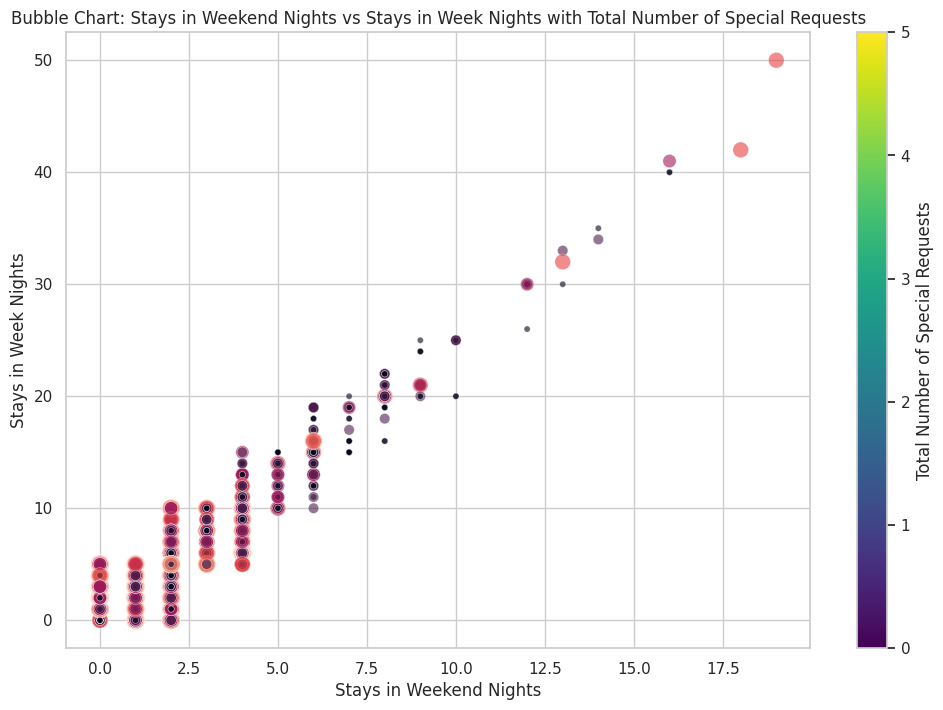

In [ ]:
# Assuming df is your dataset
plt.figure(figsize=(12, 8))

# Create a scatter plot (bubble chart)
bubble_chart = sns.scatterplot(
    data=df,
    x='stays_in_weekend_nights',
    y='stays_in_week_nights',
    size='totalno_of_special_requests',
    hue='totalno_of_special_requests',
    palette='rocket',
    sizes=(20, 200),
    legend=False,
    alpha=0.6
)

# Set the title and labels
plt.title('Bubble Chart: Stays in Weekend Nights vs Stays in Week Nights with Total Number of Special Requests')
plt.xlabel('Stays in Weekend Nights')
plt.ylabel('Stays in Week Nights')

# Add a color bar
norm = plt.Normalize(df['totalno_of_special_requests'].min(), df['totalno_of_special_requests'].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
plt.colorbar(sm, label='Total Number of Special Requests')

# Show plot
plt.show()

In [22]:
# Data features for booking date
df['booking_year'] = df['booking_date'].dt.year
df['booking_month'] = df['booking_date'].dt.month
df['booking_day'] = df['booking_date'].dt.day
df['booking_day_of_week'] = df['booking_date'].dt.dayofweek

In [23]:
# Data features for arival date
df['arrival_year'] = df['arrival_date'].dt.year
df['arrival_month'] = df['arrival_date'].dt.month
df['arrival_day'] = df['arrival_date'].dt.day
df['arrival_day_of_week'] = df['arrival_date'].dt.dayofweek

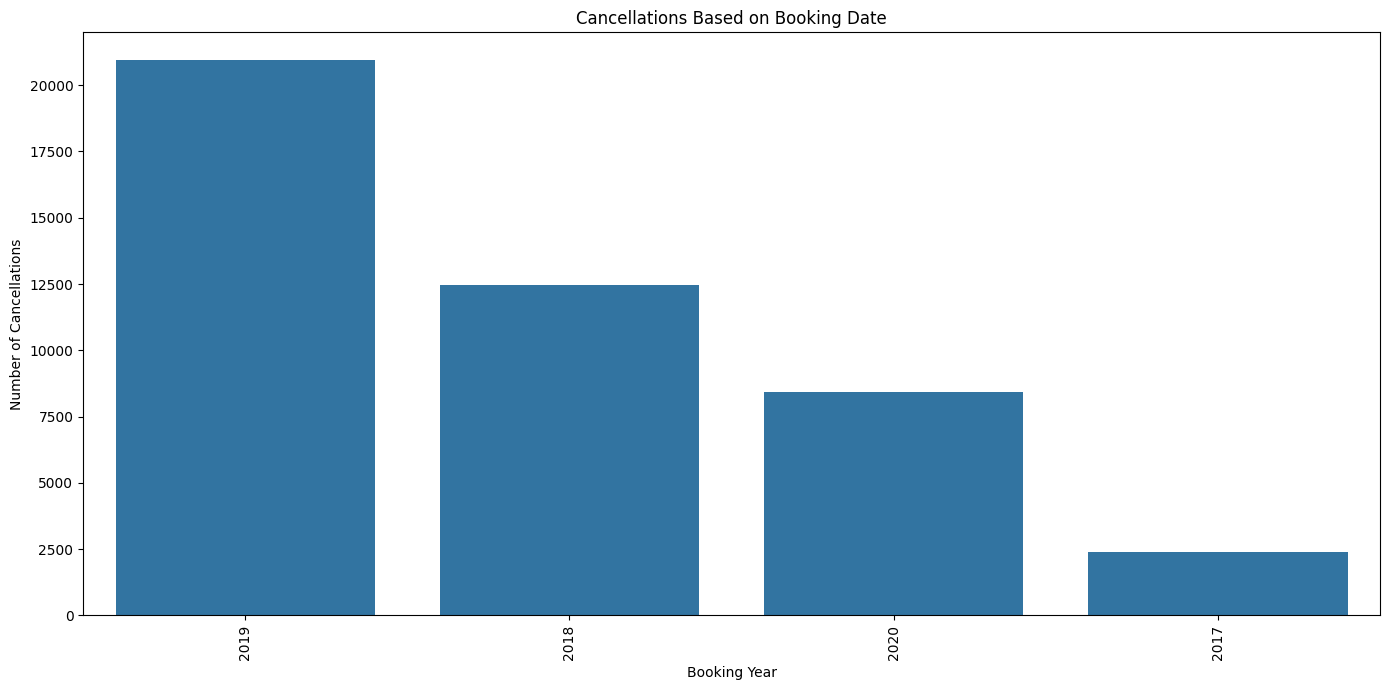

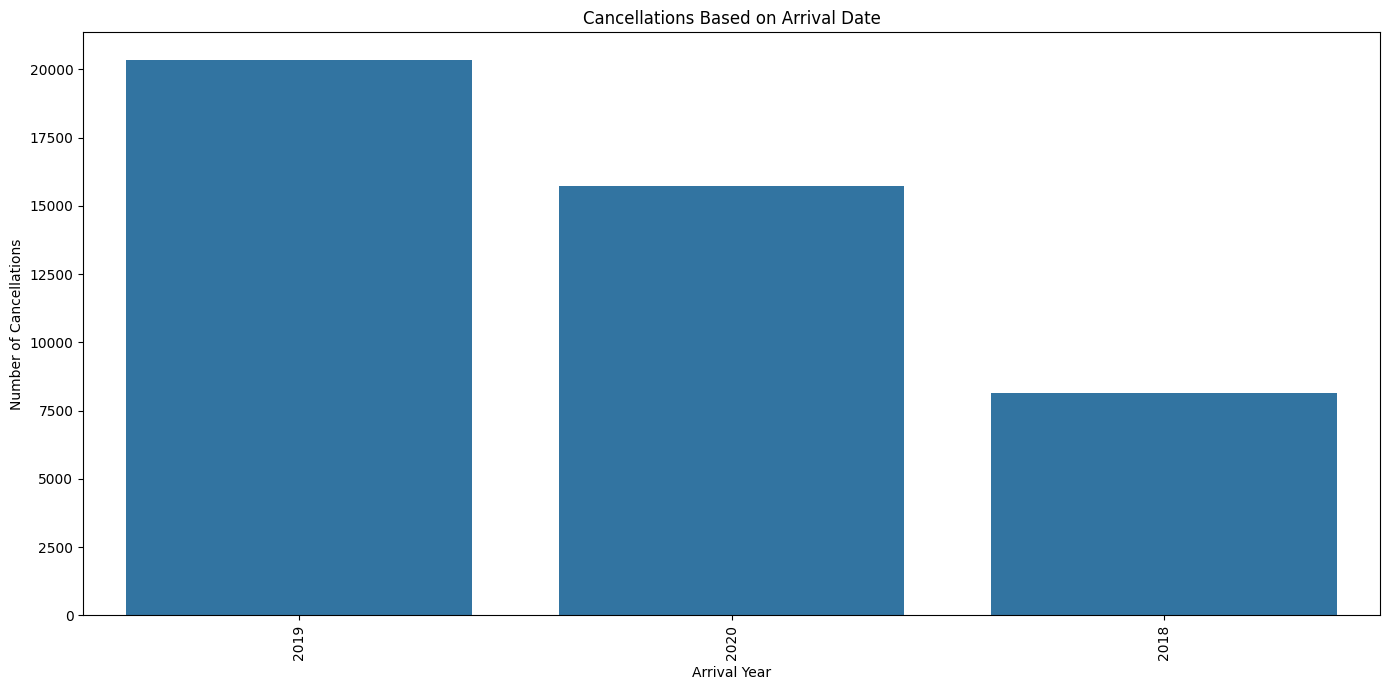

In [24]:
# Filter data for cancellations only
canceled_df = df[df['is_canceled'] == 1]

# Plot cancellations based on booking date
plt.figure(figsize=(14, 7))
sns.countplot(data=canceled_df, x='booking_year', order=canceled_df['booking_year'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Cancellations Based on Booking Date')
plt.xlabel('Booking Year')
plt.ylabel('Number of Cancellations')
plt.tight_layout()
plt.show()

# Plot cancellations based on arrival date
plt.figure(figsize=(14, 7))
sns.countplot(data=canceled_df, x='arrival_year', order=canceled_df['arrival_year'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Cancellations Based on Arrival Date')
plt.xlabel('Arrival Year')
plt.ylabel('Number of Cancellations')
plt.tight_layout()
plt.show()


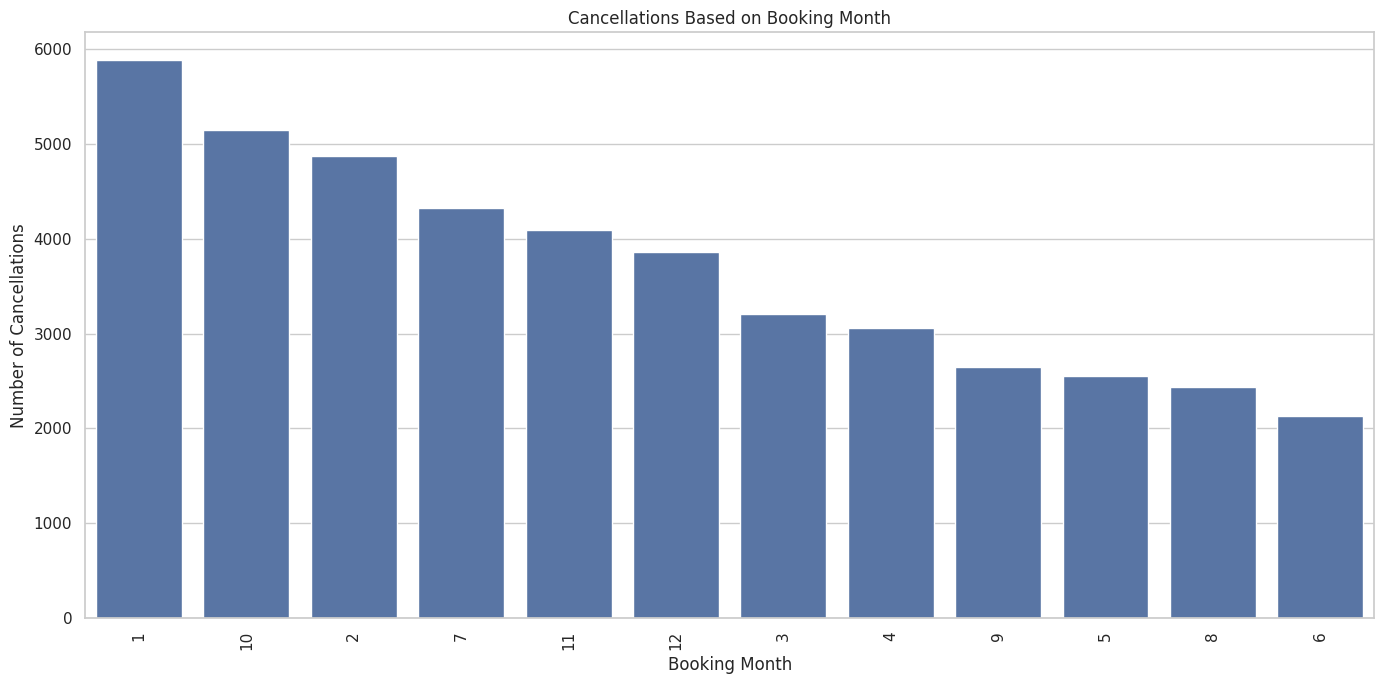

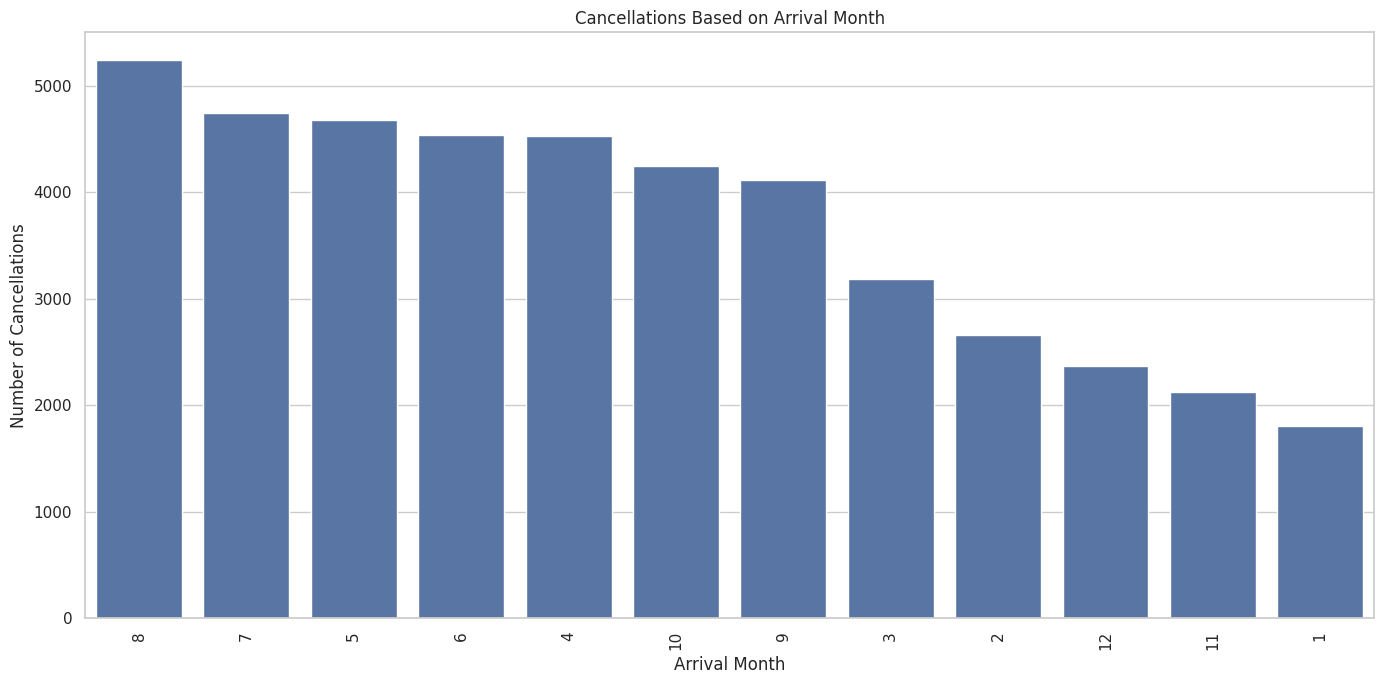

In [ ]:
# Plot cancellations based on booking date
plt.figure(figsize=(14, 7))
sns.countplot(data=canceled_df, x='booking_month', order=canceled_df['booking_month'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Cancellations Based on Booking Month')
plt.xlabel('Booking Month')
plt.ylabel('Number of Cancellations')
plt.tight_layout()
plt.show()

# Plot cancellations based on arrival date
plt.figure(figsize=(14, 7))
sns.countplot(data=canceled_df, x='arrival_month', order=canceled_df['arrival_month'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Cancellations Based on Arrival Month')
plt.xlabel('Arrival Month')
plt.ylabel('Number of Cancellations')
plt.tight_layout()
plt.show()


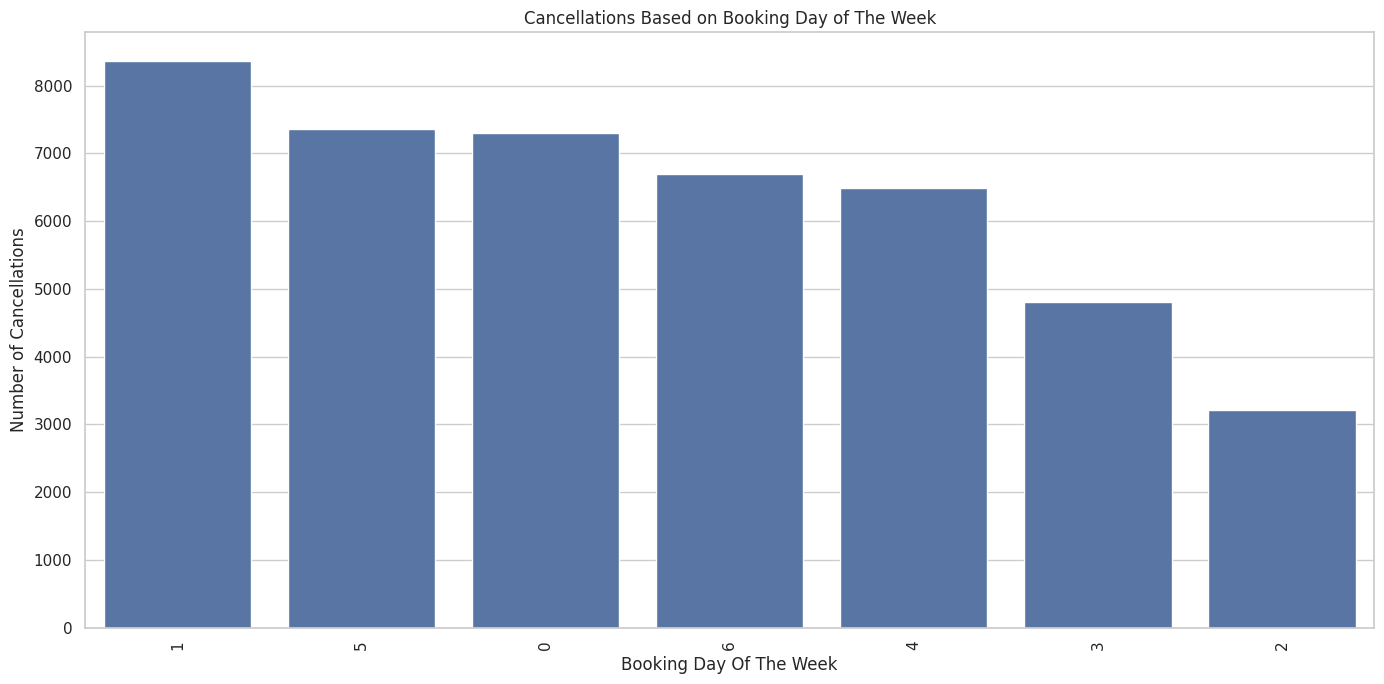

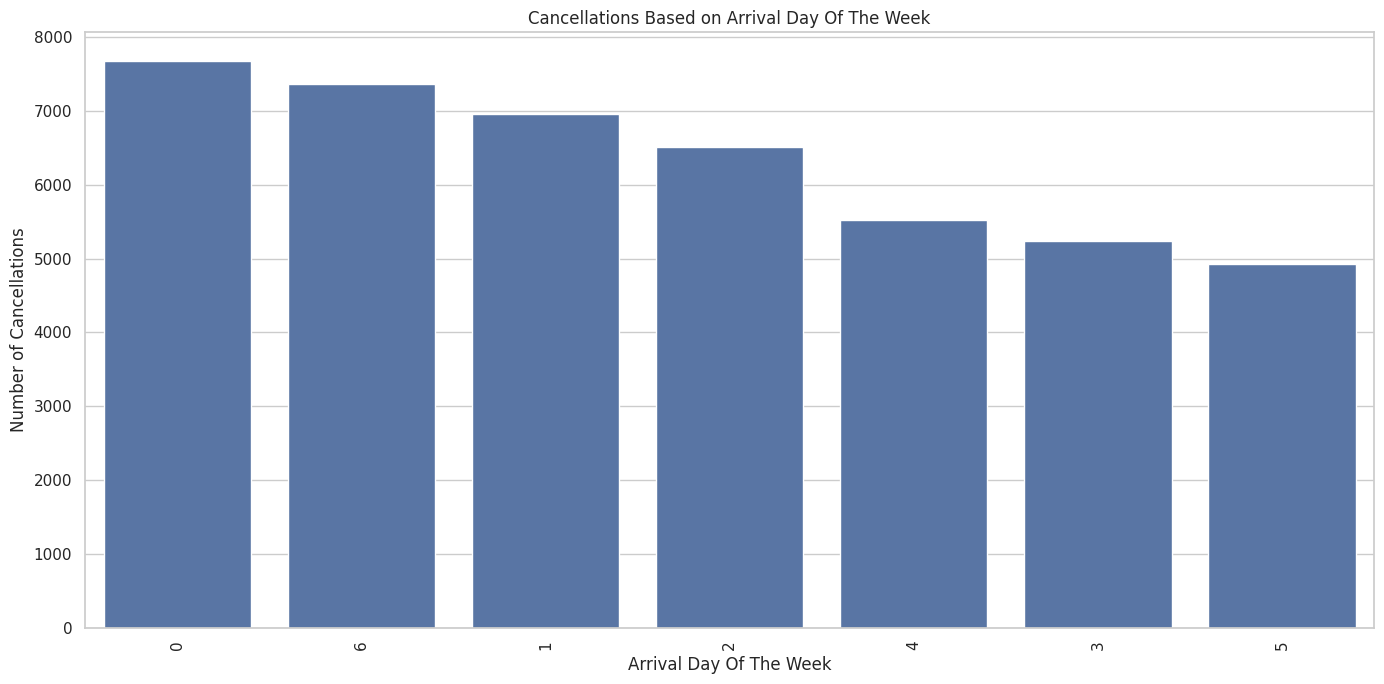

In [ ]:
# Plot cancellations based on booking date
plt.figure(figsize=(14, 7))
sns.countplot(data=canceled_df, x='booking_day_of_week', order=canceled_df['booking_day_of_week'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Cancellations Based on Booking Day of The Week')
plt.xlabel('Booking Day Of The Week')
plt.ylabel('Number of Cancellations')
plt.tight_layout()
plt.show()

# Plot cancellations based on arrival date
plt.figure(figsize=(14, 7))
sns.countplot(data=canceled_df, x='arrival_day_of_week', order=canceled_df['arrival_day_of_week'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Cancellations Based on Arrival Day Of The Week')
plt.xlabel('Arrival Day Of The Week')
plt.ylabel('Number of Cancellations')
plt.tight_layout()
plt.show()

In [25]:
df = df.drop(columns=['booking_date'])
df = df.drop(columns=['arrival_date'])

In [26]:
# Function to perform label encoding
def label_encode_columns(df):
    le = LabelEncoder()
    for column in df.select_dtypes(include=['object']).columns:
        df[column] = le.fit_transform(df[column])
    return df
# Apply the function to label encode object columns
label_encode_columns(df)

,hotel,is_canceled,stays_in_weekend_nights,stays_in_week_nights,adults,children,meal,country,market_segment,distribution_channel,...,required_car_parking_spaces,totalno_of_special_requests,booking_year,booking_month,booking_day,booking_day_of_week,arrival_year,arrival_month,arrival_day,arrival_day_of_week
0,1,0,0,0,2,0,3,135,3,1,...,0,0,2017,7,24,0,2018,7,1,6
1,1,0,0,0,2,0,3,135,3,1,...,0,0,2016,6,24,4,2018,7,1,6
2,1,0,0,1,1,0,3,59,3,1,...,0,0,2018,6,24,6,2018,7,1,6
3,1,0,0,1,1,0,3,59,2,0,...,0,0,2018,6,18,0,2018,7,1,6
4,1,0,0,2,2,0,3,59,6,3,...,0,1,2018,6,17,6,2018,7,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,2,5,2,0,3,15,5,3,...,0,0,2020,8,7,4,2020,8,30,6
119386,0,0,2,5,3,0,3,56,6,3,...,0,2,2020,5,21,3,2020,8,31,0
119387,0,0,2,5,2,0,3,43,6,3,...,0,4,2020,7,28,1,2020,8,31,0
119388,0,0,2,5,2,0,3,59,6,3,...,0,0,2020,5,14,3,2020,8,31,0


In [27]:
#df['hotel']= np.where(df['hotel']== 'type_1', '1', df['hotel'])
#df['hotel']= np.where(df['hotel']== 'type_2', '2', df['hotel'])
df['hotel'].value_counts()

,count
hotel,
0,79330
1,40060


# Treating  Outliers

In [32]:
df.shape

(119390, 30)

In [28]:
edf = df.copy()

In [44]:
# Function to treat outliers by capping them to the IQR bounds, excluding non-numeric or identifier columns
def treat_outliers_iqr(df):
    # Specify columns to exclude from outlier treatment
    exclude_columns = ['hotel', 'market_segment', 'agent', 'country', 'meal', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'booking_year', 'booking_month', 'booking_day', 'booking_day_of_week', 'arrival_year', 'arrival_month', 'arrival_day', 'arrival_day_of_week']

    for column in df.select_dtypes(include=['float64', 'int64', 'int32']).columns:
        if column not in exclude_columns:
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1

            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Replace outliers with the lower or upper bound
            df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

    return df

rdf = treat_outliers_iqr(df)

In [45]:
rdf.shape

(119390, 30)

In [46]:
def check_outliers(df):
    outlier_info = {}
    for column in df.select_dtypes(include=['float64', 'int64', 'int32']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Check if any values are still outside the bounds
        outliers_below = (df[column] < lower_bound).sum()
        outliers_above = (df[column] > upper_bound).sum()

        outlier_info[column] = {'Outliers Below': outliers_below, 'Outliers Above': outliers_above}

    return outlier_info

outliers = check_outliers(rdf)
for col, info in outliers.items():
    print(f"Column: {col}, Outliers Below: {info['Outliers Below']}, Outliers Above: {info['Outliers Above']}")


Column: hotel, Outliers Below: 0, Outliers Above: 0
Column: is_canceled, Outliers Below: 0, Outliers Above: 0
Column: stays_in_weekend_nights, Outliers Below: 0, Outliers Above: 0
Column: stays_in_week_nights, Outliers Below: 0, Outliers Above: 0
Column: adults, Outliers Below: 0, Outliers Above: 0
Column: children, Outliers Below: 0, Outliers Above: 0
Column: meal, Outliers Below: 0, Outliers Above: 0
Column: country, Outliers Below: 0, Outliers Above: 0
Column: market_segment, Outliers Below: 0, Outliers Above: 0
Column: distribution_channel, Outliers Below: 0, Outliers Above: 0
Column: is_repeated_customer, Outliers Below: 0, Outliers Above: 0
Column: previous_cancellations, Outliers Below: 0, Outliers Above: 0
Column: previous_bookings_not_canceled, Outliers Below: 0, Outliers Above: 0
Column: reserved_room_type, Outliers Below: 0, Outliers Above: 0
Column: assigned_room_type, Outliers Below: 0, Outliers Above: 0
Column: booking_changes, Outliers Below: 0, Outliers Above: 0
Column:

In [47]:
# Save the cleaned DataFrame to a new CSV file
rdf.to_csv('/content/hotel_bookings_RDF.csv', index=False)
edf.to_csv('/content/hotel_bookings_EDF.csv', index=False)

print("Outliers treated and data saved to 'hotel_bookings_RDF.csv'.")
print("Outliers treated and data saved to 'hotel_bookings_EDF.csv'.")

Outliers treated and data saved to 'hotel_bookings_RDF.csv'.
Outliers treated and data saved to 'hotel_bookings_EDF.csv'.


#Train & Test Split

In [ ]:
# Define the feature set (X) and target variable (y) that is is_canceled
X = rdf.drop(columns=['is_canceled'])
y = rdf['is_canceled']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X = rdf.drop(columns=['is_canceled'])
y = rdf['is_canceled']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [ ]:
X = edf.drop(columns=['is_canceled'])
y = edf['is_canceled']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X = edf.drop(columns=['is_canceled'])
y = edf['is_canceled']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)